# Results of Super-Resolution Experiments

Importing packages:

In [1]:
from PIL import Image, ImageStat
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
from scipy.ndimage.filters import gaussian_filter
from sklearn.cluster import MeanShift, KMeans, estimate_bandwidth
from skimage.metrics import mean_squared_error
import matplotlib.pyplot as plt
import glob 
import random
import numpy as np
import os
import re
import cv2
import argparse
import pandas as pd
import math
import torch  
import torch.nn.functional as F 

/var/folders/n2/h_p1g87j4fx1l3clf8fzzls80000gn/T/ipykernel_28234/3357147910.py:5: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter


## SRCNN

Create the data sets with results:

In [2]:
# 检查所有all文件 一共IMG_NUM = 474个图片文件 train:val:test 约为 8:4:3
# 但是多次运行中数据集的分割有细微差别（差1个） 所以对于每个只保留到全非0的列 之后全部舍去
# 以下数字是根据生成的表格手动确定的
TRAIN_NUM = 252
VAL_NUM = 126
TEST_NUM = 94

In [23]:
change = "4_001_wl_01"

In [7]:
# validation set for all 5 n-folds, Data set 4.001

# PSNR
val_results_psnr_0 = pd.read_csv('srcnn_results_4_001_wl_01/val_results_psnr_all_0.csv')
val_results_psnr_1 = pd.read_csv('srcnn_results_4_001_wl_01/val_results_psnr_all_1.csv')
val_results_psnr_2 = pd.read_csv('srcnn_results_4_001_wl_01/val_results_psnr_all_2.csv')
val_results_psnr_3 = pd.read_csv('srcnn_results_4_001_wl_01/val_results_psnr_all_3.csv')
val_results_psnr_4 = pd.read_csv('srcnn_results_4_001_wl_01/val_results_psnr_all_4.csv')

# SSIM
val_results_ssim_0 = pd.read_csv('srcnn_results_4_001_wl_01/val_results_ssim_all_0.csv')
val_results_ssim_1 = pd.read_csv('srcnn_results_4_001_wl_01/val_results_ssim_all_1.csv')
val_results_ssim_2 = pd.read_csv('srcnn_results_4_001_wl_01/val_results_ssim_all_2.csv')
val_results_ssim_3 = pd.read_csv('srcnn_results_4_001_wl_01/val_results_ssim_all_3.csv')
val_results_ssim_4 = pd.read_csv('srcnn_results_4_001_wl_01/val_results_ssim_all_4.csv')

# SSSIM
val_results_sssim_0 = pd.read_csv('srcnn_results_4_001_wl_01/val_results_sssim_all_0.csv')
val_results_sssim_1 = pd.read_csv('srcnn_results_4_001_wl_01/val_results_sssim_all_1.csv')
val_results_sssim_2 = pd.read_csv('srcnn_results_4_001_wl_01/val_results_sssim_all_2.csv')
val_results_sssim_3 = pd.read_csv('srcnn_results_4_001_wl_01/val_results_sssim_all_3.csv')
val_results_sssim_4 = pd.read_csv('srcnn_results_4_001_wl_01/val_results_sssim_all_4.csv')


In [8]:
# crop the data frames without 0s
val_results_psnr_0 = val_results_psnr_0.iloc[:VAL_NUM, 1:]
val_results_psnr_1 = val_results_psnr_1.iloc[:VAL_NUM, 1:]
val_results_psnr_2 = val_results_psnr_2.iloc[:VAL_NUM, 1:]
val_results_psnr_3 = val_results_psnr_3.iloc[:VAL_NUM, 1:]
val_results_psnr_4 = val_results_psnr_4.iloc[:VAL_NUM, 1:]

val_results_ssim_0 = val_results_ssim_0.iloc[:VAL_NUM, 1:]
val_results_ssim_1 = val_results_ssim_1.iloc[:VAL_NUM, 1:]
val_results_ssim_2 = val_results_ssim_2.iloc[:VAL_NUM, 1:]
val_results_ssim_3 = val_results_ssim_3.iloc[:VAL_NUM, 1:]
val_results_ssim_4 = val_results_ssim_4.iloc[:VAL_NUM, 1:]

val_results_sssim_0 = val_results_sssim_0.iloc[:VAL_NUM, 1:]
val_results_sssim_1 = val_results_sssim_1.iloc[:VAL_NUM, 1:]
val_results_sssim_2 = val_results_sssim_2.iloc[:VAL_NUM, 1:]
val_results_sssim_3 = val_results_sssim_3.iloc[:VAL_NUM, 1:]
val_results_sssim_4 = val_results_sssim_4.iloc[:VAL_NUM, 1:]



In [9]:
val_results_psnr_0

,0,1,2
0,54.294640,57.048954,60.779896
1,43.839321,50.445847,54.129883
2,53.981171,41.442421,56.143333
3,49.990257,56.786072,45.708000
4,49.398994,38.788460,40.138325
...,...,...,...
121,42.421265,46.468735,46.515202
122,41.439522,52.790291,56.324677
123,42.698483,56.919373,58.205208
124,54.212563,64.421700,39.167168


In [11]:
# test set for all folds

# PSNR
test_results_psnr_0 = pd.read_csv('srcnn_results_4_001_wl_01/test_results_psnr_all_0.csv')
test_results_psnr_1 = pd.read_csv('srcnn_results_4_001_wl_01/test_results_psnr_all_1.csv')
test_results_psnr_2 = pd.read_csv('srcnn_results_4_001_wl_01/test_results_psnr_all_2.csv')
test_results_psnr_3 = pd.read_csv('srcnn_results_4_001_wl_01/test_results_psnr_all_3.csv')
test_results_psnr_4 = pd.read_csv('srcnn_results_4_001_wl_01/test_results_psnr_all_4.csv')

# SSIM
test_results_ssim_0 = pd.read_csv('srcnn_results_4_001_wl_01/test_results_ssim_all_0.csv')
test_results_ssim_1 = pd.read_csv('srcnn_results_4_001_wl_01/test_results_ssim_all_1.csv')
test_results_ssim_2 = pd.read_csv('srcnn_results_4_001_wl_01/test_results_ssim_all_2.csv')
test_results_ssim_3 = pd.read_csv('srcnn_results_4_001_wl_01/test_results_ssim_all_3.csv')
test_results_ssim_4 = pd.read_csv('srcnn_results_4_001_wl_01/test_results_ssim_all_4.csv')

# SSSIM
test_results_sssim_0 = pd.read_csv('srcnn_results_4_001_wl_01/test_results_sssim_all_0.csv')
test_results_sssim_1 = pd.read_csv('srcnn_results_4_001_wl_01/test_results_sssim_all_1.csv')
test_results_sssim_2 = pd.read_csv('srcnn_results_4_001_wl_01/test_results_sssim_all_2.csv')
test_results_sssim_3 = pd.read_csv('srcnn_results_4_001_wl_01/test_results_sssim_all_3.csv')
test_results_sssim_4 = pd.read_csv('srcnn_results_4_001_wl_01/test_results_sssim_all_4.csv') 


In [12]:
# crop the data frames
test_results_psnr_0 = test_results_psnr_0.iloc[:TEST_NUM, 1:]
test_results_psnr_1 = test_results_psnr_1.iloc[:TEST_NUM, 1:]
test_results_psnr_2 = test_results_psnr_2.iloc[:TEST_NUM, 1:]
test_results_psnr_3 = test_results_psnr_3.iloc[:TEST_NUM, 1:]
test_results_psnr_4 = test_results_psnr_4.iloc[:TEST_NUM, 1:]

test_results_ssim_0 = test_results_ssim_0.iloc[:TEST_NUM, 1:]
test_results_ssim_1 = test_results_ssim_1.iloc[:TEST_NUM, 1:]
test_results_ssim_2 = test_results_ssim_2.iloc[:TEST_NUM, 1:]
test_results_ssim_3 = test_results_ssim_3.iloc[:TEST_NUM, 1:]
test_results_ssim_4 = test_results_ssim_4.iloc[:TEST_NUM, 1:]

test_results_sssim_0 = test_results_sssim_0.iloc[:TEST_NUM, 1:]
test_results_sssim_1 = test_results_sssim_1.iloc[:TEST_NUM, 1:]
test_results_sssim_2 = test_results_sssim_2.iloc[:TEST_NUM, 1:]
test_results_sssim_3 = test_results_sssim_3.iloc[:TEST_NUM, 1:]
test_results_sssim_4 = test_results_sssim_4.iloc[:TEST_NUM, 1:]



In [13]:
test_results_psnr_0

,0,1,2
0,51.979919,53.593369,54.196350
1,36.424793,37.898506,38.770000
2,48.174824,48.674644,48.460030
3,39.477512,39.526180,39.531994
4,53.280560,55.637939,56.635986
...,...,...,...
89,47.484035,48.267895,47.922894
90,54.041897,56.430656,57.032005
91,40.076565,41.169796,40.429863
92,40.669407,41.121944,40.945114


In [14]:
# train set for all folds

# PSNR
train_results_psnr_0 = pd.read_csv('srcnn_results_4_001_wl_01/train_results_psnr_all_0.csv')
train_results_psnr_1 = pd.read_csv('srcnn_results_4_001_wl_01/train_results_psnr_all_1.csv')
train_results_psnr_2 = pd.read_csv('srcnn_results_4_001_wl_01/train_results_psnr_all_2.csv')
train_results_psnr_3 = pd.read_csv('srcnn_results_4_001_wl_01/train_results_psnr_all_3.csv')
train_results_psnr_4 = pd.read_csv('srcnn_results_4_001_wl_01/train_results_psnr_all_4.csv')

# SSIM
train_results_ssim_0 = pd.read_csv('srcnn_results_4_001_wl_01/train_results_ssim_all_0.csv')
train_results_ssim_1 = pd.read_csv('srcnn_results_4_001_wl_01/train_results_ssim_all_1.csv')
train_results_ssim_2 = pd.read_csv('srcnn_results_4_001_wl_01/train_results_ssim_all_2.csv')
train_results_ssim_3 = pd.read_csv('srcnn_results_4_001_wl_01/train_results_ssim_all_3.csv')
train_results_ssim_4 = pd.read_csv('srcnn_results_4_001_wl_01/train_results_ssim_all_4.csv')

# SSSIM
train_results_sssim_0 = pd.read_csv('srcnn_results_4_001_wl_01/train_results_sssim_all_0.csv')
train_results_sssim_1 = pd.read_csv('srcnn_results_4_001_wl_01/train_results_sssim_all_1.csv')
train_results_sssim_2 = pd.read_csv('srcnn_results_4_001_wl_01/train_results_sssim_all_2.csv')
train_results_sssim_3 = pd.read_csv('srcnn_results_4_001_wl_01/train_results_sssim_all_3.csv')
train_results_sssim_4 = pd.read_csv('srcnn_results_4_001_wl_01/train_results_sssim_all_4.csv')


In [15]:
# crop the data frames
train_results_psnr_0 = train_results_psnr_0.iloc[:TRAIN_NUM, 1:]
train_results_psnr_1 = train_results_psnr_1.iloc[:TRAIN_NUM, 1:]
train_results_psnr_2 = train_results_psnr_2.iloc[:TRAIN_NUM, 1:]
train_results_psnr_3 = train_results_psnr_3.iloc[:TRAIN_NUM, 1:]
train_results_psnr_4 = train_results_psnr_4.iloc[:TRAIN_NUM, 1:]

train_results_ssim_0 = train_results_ssim_0.iloc[:TRAIN_NUM, 1:]
train_results_ssim_1 = train_results_ssim_1.iloc[:TRAIN_NUM, 1:]
train_results_ssim_2 = train_results_ssim_2.iloc[:TRAIN_NUM, 1:]
train_results_ssim_3 = train_results_ssim_3.iloc[:TRAIN_NUM, 1:]
train_results_ssim_4 = train_results_ssim_4.iloc[:TRAIN_NUM, 1:]

train_results_sssim_0 = train_results_sssim_0.iloc[:TRAIN_NUM, 1:]
train_results_sssim_1 = train_results_sssim_1.iloc[:TRAIN_NUM, 1:]
train_results_sssim_2 = train_results_sssim_2.iloc[:TRAIN_NUM, 1:]
train_results_sssim_3 = train_results_sssim_3.iloc[:TRAIN_NUM, 1:]
train_results_sssim_4 = train_results_sssim_4.iloc[:TRAIN_NUM, 1:]

In [16]:
train_results_psnr_0

,0,1,2
0,45.903469,42.978867,41.473660
1,41.957706,56.841789,50.133060
2,47.740204,51.276760,55.216797
3,43.791260,53.817745,38.781094
4,45.473839,54.888973,57.689125
...,...,...,...
247,40.188385,50.250549,46.454121
248,56.051872,56.574551,58.128551
249,57.998703,55.384277,57.192516
250,40.292591,50.035213,40.143620


## Visualize Validation data sets

### SSIM / SSSIM Scores for all n-folds separately

### N FOLD 0

(0.6, 1.02)

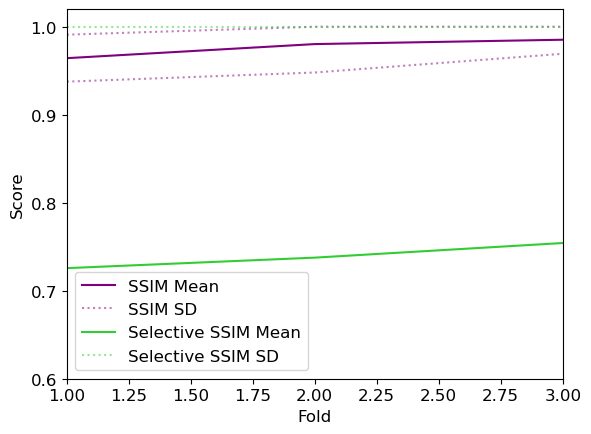

In [17]:
ssim_means = val_results_ssim_0.mean()
ssim_stds = val_results_ssim_0.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = val_results_sssim_0.mean()
sssim_stds = val_results_sssim_0.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,3,3)
# kfolds = np.linspace(1,10,10)
# kfolds = np.arange(1, 4)  # k_fold = 0, 1, 2 → 表示子模型 1~3

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks([0.6,0.7,0.8,0.9,1.0],["0.6","0.7","0.8","0.9","1.0"],fontsize=12)
plt.xlim(xmin=1, xmax=3)
plt.ylim(ymin=0.6, ymax=1.02)
# plt.savefig("srcnn_results/ssim_val_0.png")

In [18]:
print(ssim_means)
print(ssim_stds)

0    0.964264
1    0.980270
2    0.985230
dtype: float64
0    0.026685
1    0.032299
2    0.015938
dtype: float64


In [19]:
print(sssim_means)
print(sssim_stds)

0    0.725656
1    0.737588
2    0.754212
dtype: float64
0    0.338117
1    0.306587
2    0.310502
dtype: float64


ValueError: x and y must have same first dimension, but have shapes (10,) and (3,)

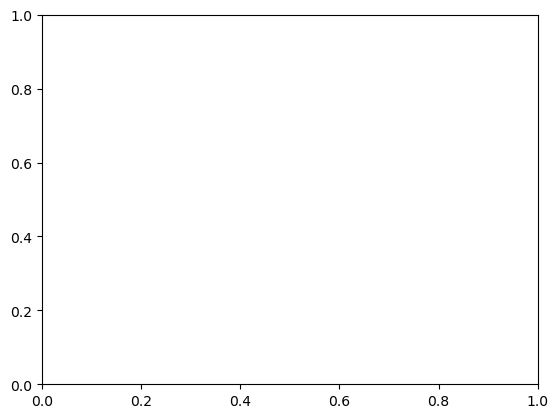

In [20]:
ssim_means = val_results_ssim_1.mean()
ssim_stds = val_results_ssim_1.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = val_results_sssim_1.mean()
sssim_stds = val_results_sssim_1.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks([0.6,0.7,0.8,0.9,1.0],["0.6","0.7","0.8","0.9","1.0"],fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.6, ymax=1.02)
plt.savefig("srcnn_results/ssim_val_1.png")

In [14]:
print(ssim_means,ssim_stds)

0    0.950574
1    0.949679
2    0.943631
3    0.962250
4    0.964120
5    0.935948
6    0.955432
7    0.959415
8    0.957730
9    0.961634
dtype: float64 0    0.069157
1    0.065233
2    0.086370
3    0.065787
4    0.042697
5    0.077767
6    0.054576
7    0.051129
8    0.051150
9    0.066220
dtype: float64


In [15]:
print(sssim_means,ssim_stds)

0    0.915327
1    0.915618
2    0.903233
3    0.922459
4    0.927561
5    0.897947
6    0.923366
7    0.916214
8    0.918772
9    0.933557
dtype: float64 0    0.069157
1    0.065233
2    0.086370
3    0.065787
4    0.042697
5    0.077767
6    0.054576
7    0.051129
8    0.051150
9    0.066220
dtype: float64


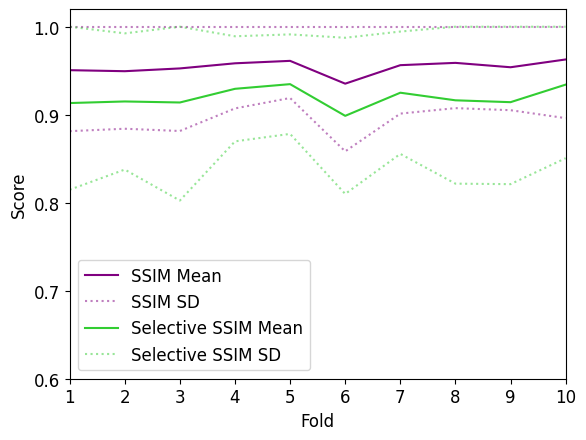

In [16]:
ssim_means = val_results_ssim_2.mean()
ssim_stds = val_results_ssim_2.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = val_results_sssim_2.mean()
sssim_stds = val_results_sssim_2.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks([0.6,0.7,0.8,0.9,1.0],["0.6","0.7","0.8","0.9","1.0"],fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.6, ymax=1.02)
plt.savefig("srcnn_results/ssim_val_2.png")

In [17]:
print(ssim_means,ssim_stds)

0    0.950622
1    0.949458
2    0.952608
3    0.958429
4    0.961209
5    0.935284
6    0.956310
7    0.958920
8    0.953947
9    0.962794
dtype: float64 0    0.069300
1    0.065390
2    0.071101
3    0.051258
4    0.042224
5    0.076905
6    0.055035
7    0.051426
8    0.048806
9    0.066677
dtype: float64


In [18]:
print(sssim_means,sssim_stds )

0    0.913268
1    0.915071
2    0.913907
3    0.929439
4    0.934745
5    0.898725
6    0.925006
7    0.916381
8    0.914257
9    0.934210
dtype: float64 0    0.098493
1    0.077393
2    0.111425
3    0.059710
4    0.056523
5    0.088732
6    0.069512
7    0.094711
8    0.093153
9    0.083595
dtype: float64


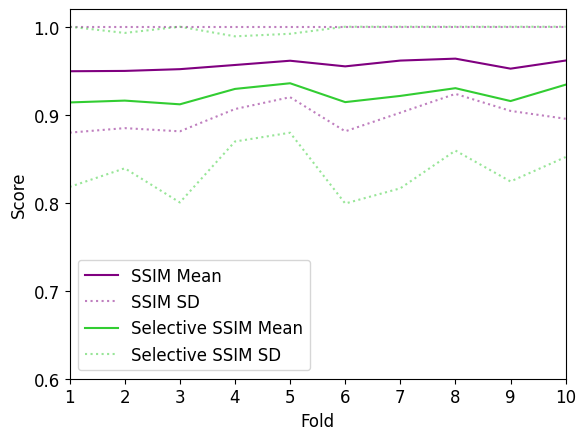

In [19]:
ssim_means = val_results_ssim_3.mean()
ssim_stds = val_results_ssim_3.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = val_results_sssim_3.mean()
sssim_stds = val_results_sssim_3.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks([0.6,0.7,0.8,0.9,1.0],["0.6","0.7","0.8","0.9","1.0"],fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.6, ymax=1.02)
plt.savefig("srcnn_results/ssim_val_3.png")

In [20]:
print(ssim_means, ssim_stds)

0    0.949410
1    0.949779
2    0.951768
3    0.956518
4    0.961354
5    0.954955
6    0.961533
7    0.963722
8    0.952352
9    0.961577
dtype: float64 0    0.069756
1    0.065021
2    0.070635
3    0.050073
4    0.041422
5    0.073808
6    0.059217
7    0.040038
8    0.048021
9    0.066177
dtype: float64


In [21]:
print(sssim_means, sssim_stds )

0    0.913963
1    0.916043
2    0.911825
3    0.929324
4    0.935758
5    0.914320
6    0.921376
7    0.930166
8    0.915534
9    0.934152
dtype: float64 0    0.095982
1    0.076902
2    0.111543
3    0.059758
4    0.056209
5    0.115229
6    0.105014
7    0.070902
8    0.091364
9    0.082249
dtype: float64


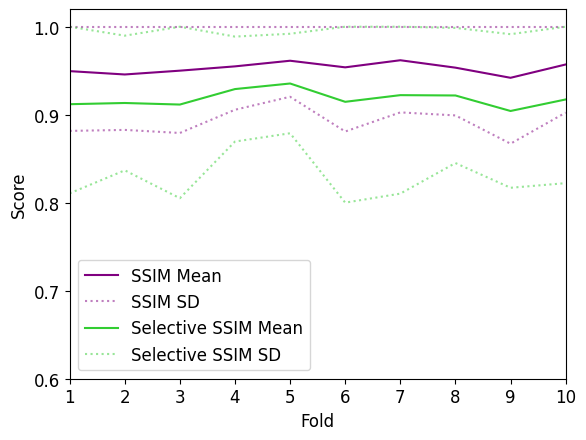

In [22]:
ssim_means = val_results_ssim_4.mean()
ssim_stds = val_results_ssim_4.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = val_results_sssim_4.mean()
sssim_stds = val_results_sssim_4.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks([0.6,0.7,0.8,0.9,1.0],["0.6","0.7","0.8","0.9","1.0"],fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.6, ymax=1.02)
plt.savefig("srcnn_results/ssim_val_4.png")

In [23]:
print(ssim_means, ssim_stds)

0    0.949540
1    0.945739
2    0.950066
3    0.954952
4    0.961347
5    0.953844
6    0.961909
7    0.953481
8    0.941964
9    0.957088
dtype: float64 0    0.067929
1    0.062997
2    0.070809
3    0.049304
4    0.040950
5    0.072910
6    0.059263
7    0.054261
8    0.074894
9    0.054682
dtype: float64


In [24]:
print(sssim_means,sssim_stds )

0    0.911953
1    0.913330
2    0.911560
3    0.929146
4    0.935474
5    0.914671
6    0.922248
7    0.921872
8    0.904248
9    0.917339
dtype: float64 0    0.101287
1    0.076506
2    0.106422
3    0.059634
4    0.056531
5    0.114581
6    0.111920
7    0.076785
8    0.087267
9    0.095100
dtype: float64


### PSNR results for all n-folds separately

(30.0, 54.0)

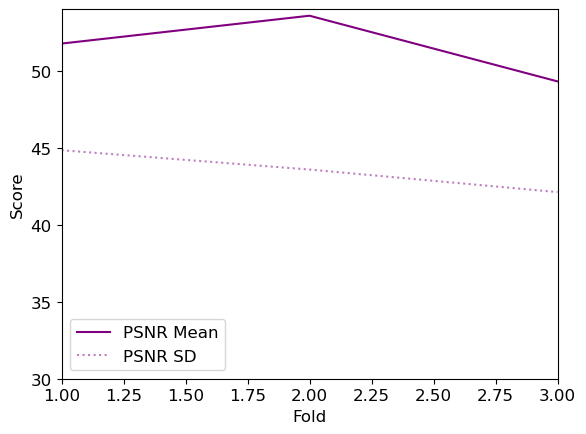

In [33]:
psnr_means = val_results_psnr_0.mean()
psnr_stds = val_results_psnr_0.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,3,3)
# kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=3)
plt.ylim(ymin=30, ymax=54)
# plt.savefig("srcnn_results/psnr_val_0.png")

In [34]:
print(psnr_means)
print(psnr_stds)

0    51.762776
1    53.571542
2    49.306641
dtype: float64
0    6.923994
1    9.988956
2    7.187688
dtype: float64


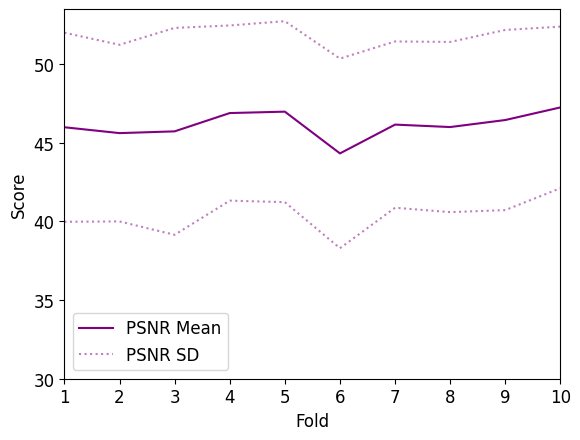

In [28]:
psnr_means = val_results_psnr_1.mean()
psnr_stds = val_results_psnr_1.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=53.5)
plt.savefig("srcnn_results/psnr_val_1.png")

In [29]:
print(psnr_means, psnr_stds)

0    45.989246
1    45.616182
2    45.727716
3    46.891303
4    46.980409
5    44.325964
6    46.157396
7    46.002049
8    46.448646
9    47.250537
dtype: float64 0    6.010813
1    5.615549
2    6.578248
3    5.569212
4    5.753345
5    6.028829
6    5.286135
7    5.411116
8    5.727982
9    5.136743
dtype: float64


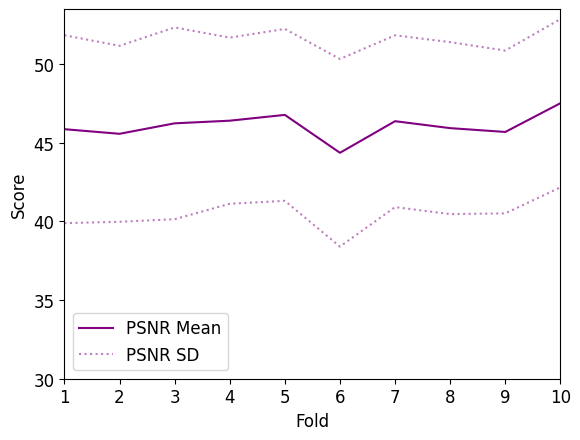

In [8]:
psnr_means = val_results_psnr_2.mean()
psnr_stds = val_results_psnr_2.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=53.5)
plt.savefig("srcnn_results/psnr_val_2.png")

In [31]:
print(psnr_means, psnr_stds)

0    45.865416
1    45.572484
2    46.238501
3    46.406438
4    46.774649
5    44.365129
6    46.374272
7    45.933088
8    45.689933
9    47.516975
dtype: float64 0    5.974399
1    5.593540
2    6.096543
3    5.282672
4    5.464993
5    5.963980
6    5.462475
7    5.466139
8    5.175173
9    5.350089
dtype: float64


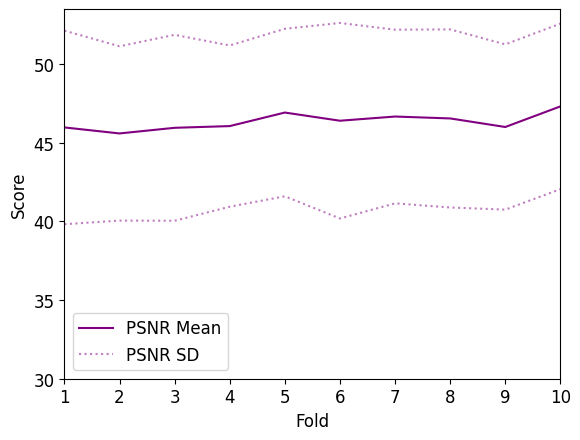

In [32]:
psnr_means = val_results_psnr_3.mean()
psnr_stds = val_results_psnr_3.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=53.5)
plt.savefig("srcnn_results/psnr_val_3.png")

In [33]:
print(psnr_means, psnr_stds)

0    45.977374
1    45.595624
2    45.953959
3    46.062969
4    46.923876
5    46.404051
6    46.670378
7    46.549727
8    46.005476
9    47.315153
dtype: float64 0    6.153242
1    5.542066
2    5.911079
3    5.126133
4    5.324130
5    6.215689
6    5.520571
7    5.661359
8    5.253741
9    5.262519
dtype: float64


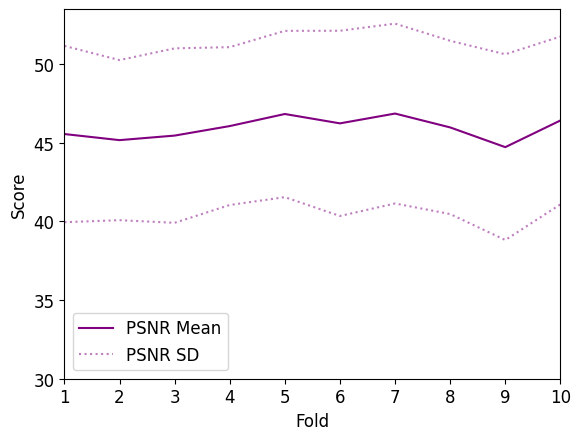

In [34]:
psnr_means = val_results_psnr_4.mean()
psnr_stds = val_results_psnr_4.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=53.5)
plt.savefig("srcnn_results/psnr_val_4.png")

In [35]:
print(psnr_means, psnr_stds)

0    45.557668
1    45.169886
2    45.459037
3    46.064306
4    46.831690
5    46.236037
6    46.860130
7    45.978125
8    44.724272
9    46.419428
dtype: float64 0    5.605363
1    5.089888
2    5.546045
3    5.018547
4    5.286895
5    5.888629
6    5.717779
7    5.507883
8    5.906185
9    5.334295
dtype: float64


## Visualize Test Set

### SSIM / SSSIM Comparison for each n-fold

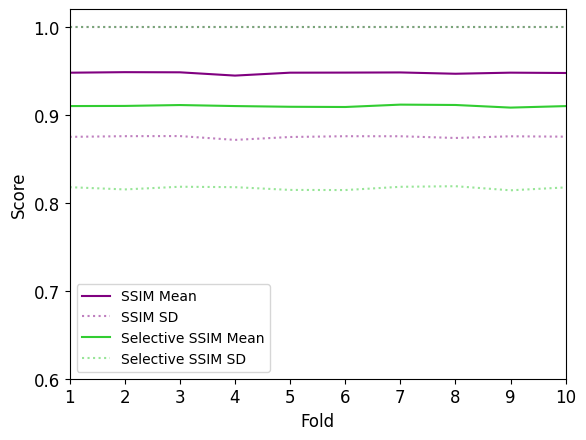

In [10]:
ssim_means = test_results_ssim_0.mean()
ssim_stds = test_results_ssim_0.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = test_results_sssim_0.mean()
sssim_stds = test_results_sssim_0.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks([0.6,0.7,0.8,0.9,1.0],["0.6","0.7","0.8","0.9","1.0"],fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.6, ymax=1.02)
plt.savefig("srcnn_results/ssim_test_0.png")

In [37]:
print(ssim_means, ssim_stds)

0    0.947749
1    0.948360
2    0.948196
3    0.944464
4    0.947775
5    0.947866
6    0.948049
7    0.946557
8    0.947795
9    0.947420
dtype: float64 0    0.072902
1    0.072742
2    0.072451
3    0.073077
4    0.073079
5    0.072290
6    0.072507
7    0.072973
8    0.072308
9    0.072351
dtype: float64


In [38]:
print(sssim_means,sssim_stds)

0    0.909839
1    0.909994
2    0.910996
3    0.909843
4    0.909033
5    0.908775
6    0.911474
7    0.911067
8    0.908091
9    0.909797
dtype: float64 0    0.092182
1    0.094881
2    0.092845
3    0.092161
4    0.094492
5    0.094375
6    0.093388
7    0.092300
8    0.093985
9    0.092406
dtype: float64


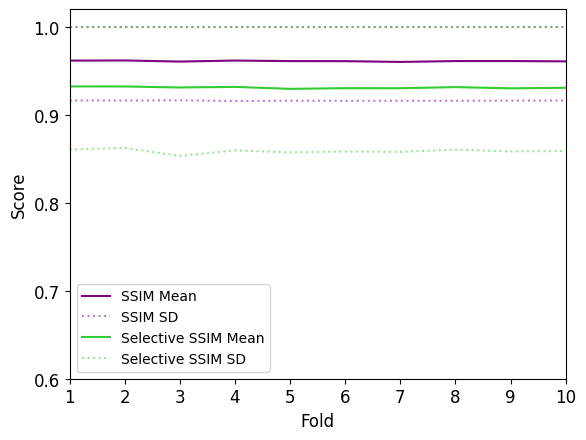

In [39]:
ssim_means = test_results_ssim_1.mean()
ssim_stds = test_results_ssim_1.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = test_results_sssim_1.mean()
sssim_stds = test_results_sssim_1.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks([0.6,0.7,0.8,0.9,1.0],["0.6","0.7","0.8","0.9","1.0"],fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.6, ymax=1.02)
plt.savefig("srcnn_results/ssim_test_1.png")

In [40]:
print(ssim_means, ssim_stds)

0    0.961492
1    0.961653
2    0.960408
3    0.961564
4    0.960934
5    0.960859
6    0.959996
7    0.960962
8    0.960985
9    0.960643
dtype: float64 0    0.045259
1    0.045547
2    0.044047
3    0.046045
4    0.045005
5    0.045088
6    0.044128
7    0.045126
8    0.045037
9    0.044457
dtype: float64


In [41]:
print(sssim_means,sssim_stds)

0    0.932188
1    0.932114
2    0.930964
3    0.931633
4    0.929409
5    0.930158
6    0.930117
7    0.931384
8    0.930000
9    0.930607
dtype: float64 0    0.071651
1    0.069920
2    0.077766
3    0.072105
4    0.072190
5    0.071954
6    0.072254
7    0.071089
8    0.071690
9    0.071805
dtype: float64


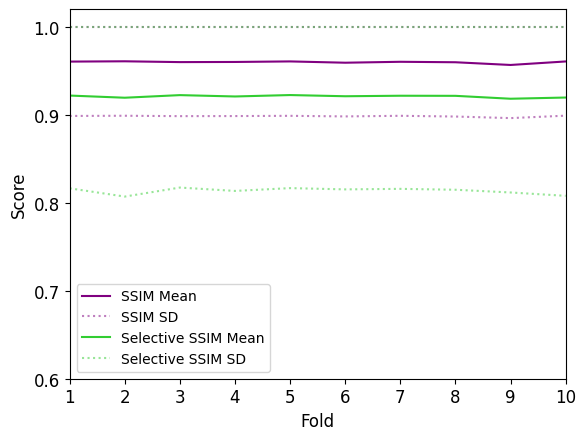

In [42]:
ssim_means = test_results_ssim_2.mean()
ssim_stds = test_results_ssim_2.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = test_results_sssim_2.mean()
sssim_stds = test_results_sssim_2.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks([0.6,0.7,0.8,0.9,1.0],["0.6","0.7","0.8","0.9","1.0"],fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.6, ymax=1.02)
plt.savefig("srcnn_results/ssim_test_2.png")

In [43]:
print(ssim_means, ssim_stds)

0    0.960369
1    0.960715
2    0.959788
3    0.959954
4    0.960572
5    0.959102
6    0.960152
7    0.959625
8    0.956541
9    0.960525
dtype: float64 0    0.061772
1    0.061883
2    0.061404
3    0.061473
4    0.061827
5    0.061022
6    0.061376
7    0.061681
8    0.060380
9    0.061605
dtype: float64


In [44]:
print(sssim_means,sssim_stds)

0    0.921776
1    0.919314
2    0.922276
3    0.920738
4    0.922354
5    0.920998
6    0.921576
7    0.921462
8    0.918165
9    0.919532
dtype: float64 0    0.105418
1    0.112328
2    0.105048
3    0.107331
4    0.105761
5    0.105833
6    0.105823
7    0.106717
8    0.106522
9    0.111704
dtype: float64


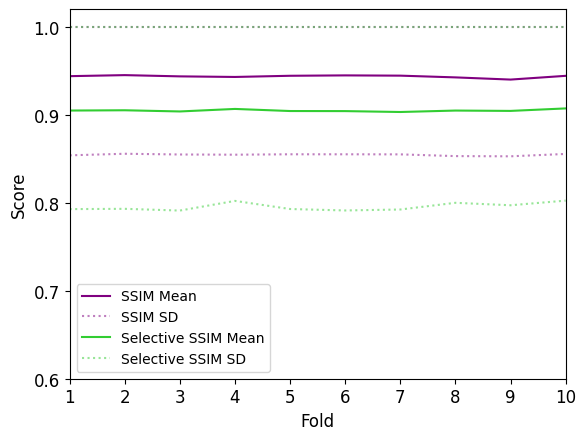

In [45]:
ssim_means = test_results_ssim_3.mean()
ssim_stds = test_results_ssim_3.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = test_results_sssim_3.mean()
sssim_stds = test_results_sssim_3.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks([0.6,0.7,0.8,0.9,1.0],["0.6","0.7","0.8","0.9","1.0"],fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.6, ymax=1.02)
plt.savefig("srcnn_results/ssim_test_3.png")

In [46]:
print(ssim_means, ssim_stds)

0    0.943819
1    0.944998
2    0.943582
3    0.942918
4    0.944259
5    0.944695
6    0.944399
7    0.942425
8    0.939942
9    0.944187
dtype: float64 0    0.089962
1    0.089358
2    0.088770
3    0.088345
4    0.089220
5    0.089663
6    0.089450
7    0.089453
8    0.087200
9    0.088756
dtype: float64


In [47]:
print(sssim_means,sssim_stds)

0    0.904739
1    0.905062
2    0.903709
3    0.906575
4    0.904196
5    0.904109
6    0.903095
7    0.904728
8    0.904334
9    0.907163
dtype: float64 0    0.111990
1    0.112004
2    0.112613
3    0.104513
4    0.111346
5    0.112904
6    0.110804
7    0.104830
8    0.107223
9    0.104771
dtype: float64


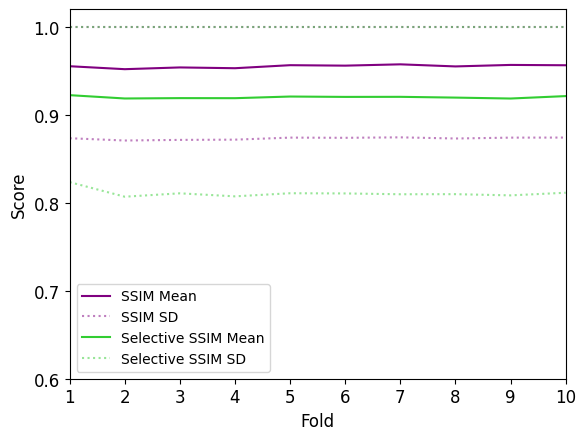

In [9]:
ssim_means = test_results_ssim_4.mean()
ssim_stds = test_results_ssim_4.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = test_results_sssim_4.mean()
sssim_stds = test_results_sssim_4.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks([0.6,0.7,0.8,0.9,1.0],["0.6","0.7","0.8","0.9","1.0"],fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.6, ymax=1.02)
plt.savefig("srcnn_results/ssim_test_4.png")

In [49]:
print(ssim_means, ssim_stds)

0    0.955108
1    0.951752
2    0.953737
3    0.952849
4    0.956291
5    0.955774
6    0.957260
7    0.954886
8    0.956590
9    0.956211
dtype: float64 0    0.081825
1    0.081061
2    0.082344
3    0.081182
4    0.082302
5    0.082003
6    0.082971
7    0.081911
8    0.082621
9    0.082155
dtype: float64


In [50]:
print(sssim_means,sssim_stds)

0    0.922231
1    0.918454
2    0.918866
3    0.918797
4    0.920668
5    0.920250
6    0.920333
7    0.919458
8    0.918407
9    0.921164
dtype: float64 0    0.098823
1    0.111624
2    0.108187
3    0.111554
4    0.109897
5    0.109698
6    0.110713
7    0.109732
8    0.110050
9    0.109821
dtype: float64


### SSIM / SSSIM Comparison for all n-folds

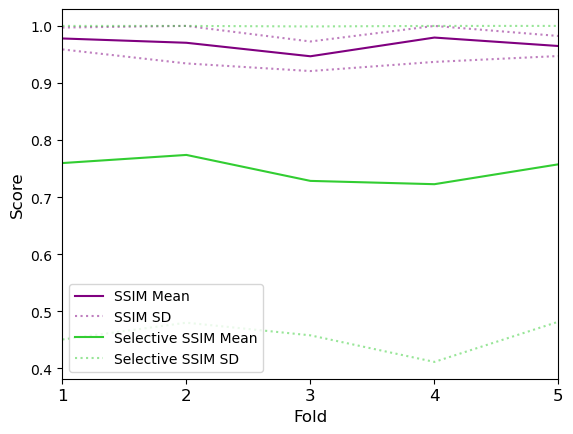

In [24]:
ssim_means_0 = test_results_ssim_0.mean()
ssim_stds_0 = test_results_ssim_0.std()
ssim_std_upper_0 = ssim_means_0 + ssim_stds_0
ssim_std_lower_0 = ssim_means_0 - ssim_stds_0
ssim_means_0 = ssim_means_0.mean()
ssim_stds_0 = ssim_stds_0.mean()
ssim_std_upper_0 = ssim_std_upper_0.mean()
ssim_std_lower_0 = ssim_std_lower_0.mean()

ssim_means_1 = test_results_ssim_1.mean()
ssim_stds_1 = test_results_ssim_1.std()
ssim_std_upper_1 = ssim_means_1 + ssim_stds_1
ssim_std_lower_1 = ssim_means_1 - ssim_stds_1
ssim_means_1 = ssim_means_1.mean()
ssim_stds_1 = ssim_stds_1.mean()
ssim_std_upper_1 = ssim_std_upper_1.mean()
ssim_std_lower_1 = ssim_std_lower_1.mean()

ssim_means_2 = test_results_ssim_2.mean()
ssim_stds_2 = test_results_ssim_2.std()
ssim_std_upper_2 = ssim_means_2 + ssim_stds_2
ssim_std_lower_2 = ssim_means_2 - ssim_stds_2
ssim_means_2 = ssim_means_2.mean()
ssim_stds_2 = ssim_stds_2.mean()
ssim_std_upper_2 = ssim_std_upper_2.mean()
ssim_std_lower_2 = ssim_std_lower_2.mean()

ssim_means_3 = test_results_ssim_3.mean()
ssim_stds_3 = test_results_ssim_3.std()
ssim_std_upper_3 = ssim_means_3 + ssim_stds_3
ssim_std_lower_3 = ssim_means_3 - ssim_stds_3
ssim_means_3 = ssim_means_3.mean()
ssim_stds_3 = ssim_stds_3.mean()
ssim_std_upper_3 = ssim_std_upper_3.mean()
ssim_std_lower_3 = ssim_std_lower_3.mean()

ssim_means_4 = test_results_ssim_4.mean()
ssim_stds_4 = test_results_ssim_4.std()
ssim_std_upper_4 = ssim_means_4 + ssim_stds_4
ssim_std_lower_4 = ssim_means_4 - ssim_stds_4
ssim_means_4 = ssim_means_4.mean()
ssim_stds_4 = ssim_stds_4.mean()
ssim_std_upper_4 = ssim_std_upper_4.mean()
ssim_std_lower_4 = ssim_std_lower_4.mean()

ssim_means = [ssim_means_0, ssim_means_1, ssim_means_2, ssim_means_3, ssim_means_4]
ssim_stds = [ssim_stds_0, ssim_stds_1, ssim_stds_2, ssim_stds_3, ssim_stds_4]
ssim_std_upper = [ssim_std_upper_0, ssim_std_upper_1, ssim_std_upper_2, ssim_std_upper_3, ssim_std_upper_4]
ssim_std_lower = [ssim_std_lower_0, ssim_std_lower_1, ssim_std_lower_2, ssim_std_lower_3, ssim_std_lower_4]

for i in range(len(ssim_std_upper)):
    if ssim_std_upper[i] > 1:
        ssim_std_upper[i] = 1

sssim_means_0 = test_results_sssim_0.mean()
sssim_stds_0 = test_results_sssim_0.std()
sssim_std_upper_0 = sssim_means_0 + sssim_stds_0
sssim_std_lower_0 = sssim_means_0 - sssim_stds_0
sssim_means_0 = sssim_means_0.mean()
sssim_stds_0 = sssim_stds_0.mean()
sssim_std_upper_0 = sssim_std_upper_0.mean()
sssim_std_lower_0 = sssim_std_lower_0.mean()

sssim_means_1 = test_results_sssim_1.mean()
sssim_stds_1 = test_results_sssim_1.std()
sssim_std_upper_1 = sssim_means_1 + sssim_stds_1
sssim_std_lower_1 = sssim_means_1 - sssim_stds_1
sssim_means_1 = sssim_means_1.mean()
sssim_stds_1 = sssim_stds_1.mean()
sssim_std_upper_1 = sssim_std_upper_1.mean()
sssim_std_lower_1 = sssim_std_lower_1.mean()

sssim_means_2 = test_results_sssim_2.mean()
sssim_stds_2 = test_results_sssim_2.std()
sssim_std_upper_2 = sssim_means_2 + sssim_stds_2
sssim_std_lower_2 = sssim_means_2 - sssim_stds_2
sssim_means_2 = sssim_means_2.mean()
sssim_stds_2 = sssim_stds_2.mean()
sssim_std_upper_2 = sssim_std_upper_2.mean()
sssim_std_lower_2 = sssim_std_lower_2.mean()

sssim_means_3 = test_results_sssim_3.mean()
sssim_stds_3 = test_results_sssim_3.std()
sssim_std_upper_3 = sssim_means_3 + sssim_stds_3
sssim_std_lower_3 = sssim_means_3 - sssim_stds_3
sssim_means_3 = sssim_means_3.mean()
sssim_stds_3 = sssim_stds_3.mean()
sssim_std_upper_3 = sssim_std_upper_3.mean()
sssim_std_lower_3 = sssim_std_lower_3.mean()

sssim_means_4 = test_results_sssim_4.mean()
sssim_stds_4 = test_results_sssim_4.std()
sssim_std_upper_4 = sssim_means_4 + sssim_stds_4
sssim_std_lower_4 = sssim_means_4 - sssim_stds_4
sssim_means_4 = sssim_means_4.mean()
sssim_stds_4 = sssim_stds_4.mean()
sssim_std_upper_4 = sssim_std_upper_4.mean()
sssim_std_lower_4 = sssim_std_lower_4.mean()

sssim_means = [sssim_means_0, sssim_means_1, sssim_means_2, sssim_means_3, sssim_means_4]
sssim_stds = [sssim_stds_0, sssim_stds_1, sssim_stds_2, sssim_stds_3, sssim_stds_4]
sssim_std_upper = [sssim_std_upper_0, sssim_std_upper_1, sssim_std_upper_2, sssim_std_upper_3, sssim_std_upper_4]
sssim_std_lower = [sssim_std_lower_0, sssim_std_lower_1, sssim_std_lower_2, sssim_std_lower_3, sssim_std_lower_4]

for i in range(len(sssim_std_upper)):
    if sssim_std_upper[i] > 1:
        sssim_std_upper[i] = 1



n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(n_folds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(n_folds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(n_folds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)


plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],["1","2","3","4","5"],fontsize=12)
# plt.yticks([0.6,0.7,0.8,0.9,1.0],["0.6","0.7","0.8","0.9","1.0"],fontsize=12)
plt.xlim(xmin=1, xmax=5)
# plt.ylim(ymin=0.6, ymax=1.02)
plt.savefig("srcnn_results_"+change+"/ssim_test_mean_all_folds.png")

In [25]:
print(ssim_means)
print(ssim_stds)

[0.9780119203083905, 0.9704750486722228, 0.9468369141538092, 0.9796104615039014, 0.9648159543673197]
[0.019164323147448245, 0.036204378857993345, 0.02590301802796609, 0.042651973958070355, 0.017555311381032643]


In [26]:
print(sssim_means)
print(sssim_stds)

[0.7597588309952131, 0.7739895937819008, 0.7285038330559189, 0.722724918038287, 0.7575492880815733]
[0.30906993962938406, 0.29390921477561, 0.2705792573888261, 0.3113658516432796, 0.27573534777690806]


### SSSIM/SSIM Comparison over all n-folds 疑似与上面完全相同


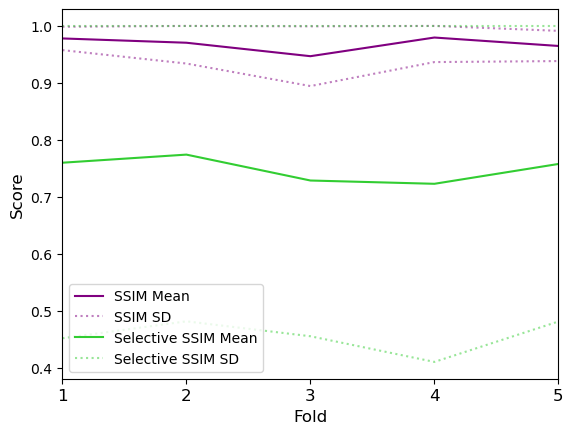

In [28]:
fold_0_test_ssim = np.array(test_results_ssim_0).reshape(-1,1)
fold_1_test_ssim = np.array(test_results_ssim_1).reshape(-1,1)
fold_2_test_ssim = np.array(test_results_ssim_2).reshape(-1,1)
fold_3_test_ssim = np.array(test_results_ssim_3).reshape(-1,1)
fold_4_test_ssim = np.array(test_results_ssim_4).reshape(-1,1)

ssim_means_0 = np.mean(fold_0_test_ssim)
ssim_std_0 = np.std(fold_0_test_ssim)
ssim_std_upper_0 = ssim_means_0 + ssim_std_0
ssim_std_lower_0 = ssim_means_0 - ssim_std_0
if ssim_std_upper_0 > 1:
    ssim_std_upper_0 = 1

ssim_means_1 = np.mean(fold_1_test_ssim)
ssim_std_1 = np.std(fold_1_test_ssim)
ssim_std_upper_1 = ssim_means_1 + ssim_std_1
ssim_std_lower_1 = ssim_means_1 - ssim_std_1
if ssim_std_upper_1 > 1:
    ssim_std_upper_1 = 1

ssim_means_2 = np.mean(fold_2_test_ssim)
ssim_std_2 = np.std(fold_2_test_ssim)
ssim_std_upper_2 = ssim_means_2 + ssim_std_2
ssim_std_lower_2 = ssim_means_2 - ssim_std_2
if ssim_std_upper_2 > 1:
    ssim_std_upper_2 = 1

ssim_means_3 = np.mean(fold_3_test_ssim)
ssim_std_3 = np.std(fold_3_test_ssim)
ssim_std_upper_3 = ssim_means_3 + ssim_std_3
ssim_std_lower_3 = ssim_means_3 - ssim_std_3
if ssim_std_upper_3 > 1:
    ssim_std_upper_3 = 1

ssim_means_4 = np.mean(fold_4_test_ssim)
ssim_std_4 = np.std(fold_4_test_ssim)
ssim_std_upper_4 = ssim_means_4 + ssim_std_4
ssim_std_lower_4 = ssim_means_4 - ssim_std_4
if ssim_std_upper_4 > 1:
    ssim_std_upper_4 = 1
    
ssim_means = [ssim_means_0, ssim_means_1, ssim_means_2, ssim_means_3, ssim_means_4]
ssim_stds = [ssim_std_0, ssim_std_1, ssim_std_2, ssim_std_3, ssim_std_4]
ssim_std_upper = [ssim_std_upper_0, ssim_std_upper_1, ssim_std_upper_2, ssim_std_upper_3, ssim_std_upper_4]
ssim_std_lower = [ssim_std_lower_0, ssim_std_lower_1, ssim_std_lower_2, ssim_std_lower_3, ssim_std_lower_4]

fold_0_test_sssim = np.array(test_results_sssim_0).reshape(-1,1)
fold_1_test_sssim = np.array(test_results_sssim_1).reshape(-1,1)
fold_2_test_sssim = np.array(test_results_sssim_2).reshape(-1,1)
fold_3_test_sssim = np.array(test_results_sssim_3).reshape(-1,1)
fold_4_test_sssim = np.array(test_results_sssim_4).reshape(-1,1)

sssim_means_0 = np.mean(fold_0_test_sssim)
sssim_std_0 = np.std(fold_0_test_sssim)
sssim_std_upper_0 = sssim_means_0 + sssim_std_0
sssim_std_lower_0 = sssim_means_0 - sssim_std_0
if sssim_std_upper_0 > 1:
    sssim_std_upper_0 = 1

sssim_means_1 = np.mean(fold_1_test_sssim)
sssim_std_1 = np.std(fold_1_test_sssim)
sssim_std_upper_1 = sssim_means_1 + sssim_std_1
sssim_std_lower_1 = sssim_means_1 - sssim_std_1
if sssim_std_upper_1 > 1:
    sssim_std_upper_1 = 1

sssim_means_2 = np.mean(fold_2_test_sssim)
sssim_std_2 = np.std(fold_2_test_sssim)
sssim_std_upper_2 = sssim_means_2 + sssim_std_2
sssim_std_lower_2 = sssim_means_2 - sssim_std_2
if sssim_std_upper_2 > 1:
    sssim_std_upper_2 = 1

sssim_means_3 = np.mean(fold_3_test_sssim)
sssim_std_3 = np.std(fold_3_test_sssim)
sssim_std_upper_3 = sssim_means_3 + sssim_std_3
sssim_std_lower_3 = sssim_means_3 - sssim_std_3
if sssim_std_upper_3 > 1:
    sssim_std_upper_3 = 1

sssim_means_4 = np.mean(fold_4_test_sssim)
sssim_std_4 = np.std(fold_4_test_sssim)
sssim_std_upper_4 = sssim_means_4 + sssim_std_4
sssim_std_lower_4 = sssim_means_4 - sssim_std_4
if sssim_std_upper_4 > 1:
    sssim_std_upper_4 = 1
    
    
sssim_means = [sssim_means_0, sssim_means_1, sssim_means_2, sssim_means_3, sssim_means_4]
sssim_stds = [sssim_std_0, sssim_std_1, sssim_std_2, sssim_std_3, sssim_std_4]
sssim_std_upper = [sssim_std_upper_0, sssim_std_upper_1, sssim_std_upper_2, sssim_std_upper_3, sssim_std_upper_4]
sssim_std_lower = [sssim_std_lower_0, sssim_std_lower_1, sssim_std_lower_2, sssim_std_lower_3, sssim_std_lower_4]

n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(n_folds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(n_folds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(n_folds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)


plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],["1","2","3","4","5"],fontsize=12)
# plt.yticks([0.6,0.7,0.8,0.9,1.0],["0.6","0.7","0.8","0.9","1.0"],fontsize=12)
plt.xlim(xmin=1, xmax=5)
# plt.ylim(ymin=0.6, ymax=1.02)
plt.savefig("srcnn_results_"+change+"/ssim_test_mean_std_all_folds.png")


In [29]:
print(ssim_means)
print(ssim_stds)

[0.9780119203083905, 0.9704750486722229, 0.9468369141538092, 0.9796104615039014, 0.9648159543673197]
[0.020517708508890516, 0.036534584474185644, 0.05246306600577135, 0.04309474535651176, 0.026546276817931813]


In [30]:
print(sssim_means, sssim_stds)

[0.759758830995213, 0.7739895937819008, 0.7285038330559189, 0.7227249180382871, 0.7575492880815733] [0.30832181924399327, 0.2927930406065265, 0.2735160480123362, 0.31283280393311585, 0.2766864388731186]


### Stability Score Calculations

In [31]:
stability_score = 1 - 2*np.mean(sssim_stds)
print(stability_score)

0.4143399397323637


### Distribution of SSIM/SSSIM Values


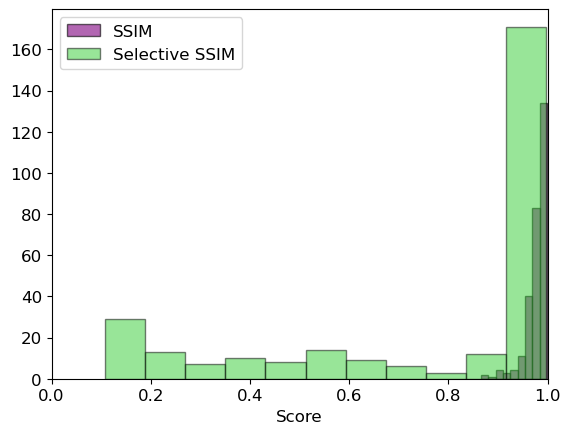

In [32]:
# n fold 0 

plt.figure()
plt.hist(fold_0_test_ssim, bins=9, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_0_test_sssim, bins=11, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
# plt.hist(fold_0_test_ssim, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
# plt.hist(fold_0_test_sssim, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("srcnn_results_"+change+"/ssim_distribution_test_0.png")

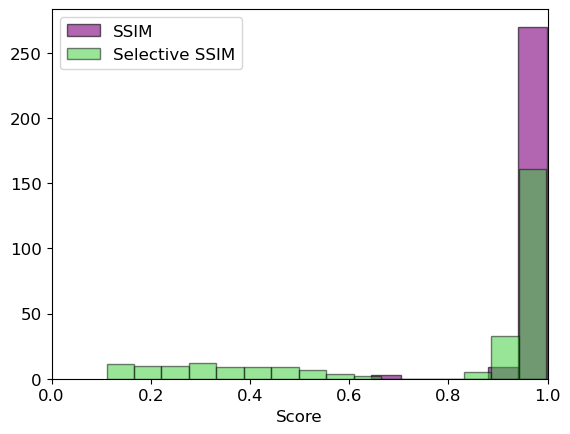

In [33]:
# n fold 1

plt.figure()
plt.hist(fold_1_test_ssim, bins=6, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_1_test_sssim, bins=16, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("srcnn_results_"+change+"/ssim_distribution_test_1.png")

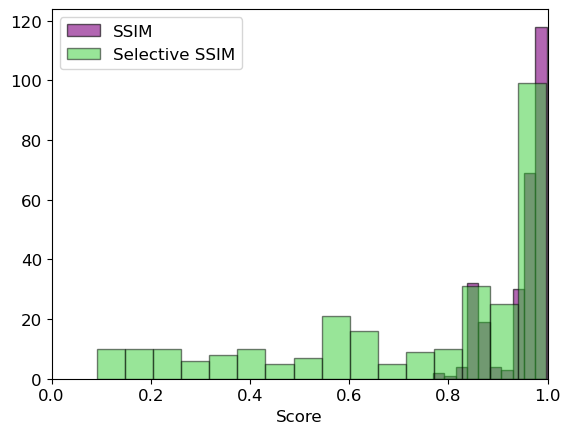

In [34]:
# n fold 2

plt.figure()
plt.hist(fold_2_test_ssim, bins=10, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_2_test_sssim, bins=16, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("srcnn_results_"+change+"/ssim_distribution_test_2.png")

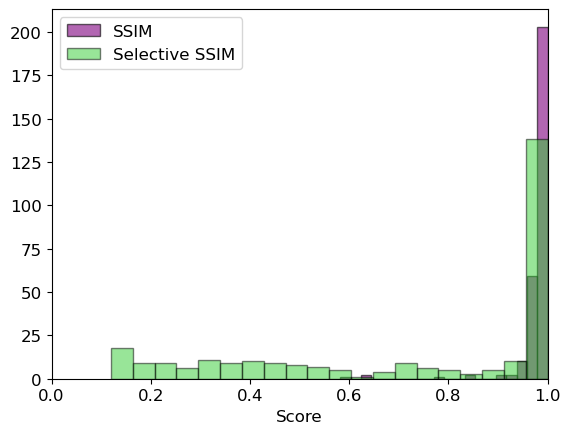

In [35]:
# n fold 3

plt.figure()
plt.hist(fold_3_test_ssim, bins=20, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_3_test_sssim, bins=20, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("srcnn_results_"+change+"/ssim_distribution_test_3.png")

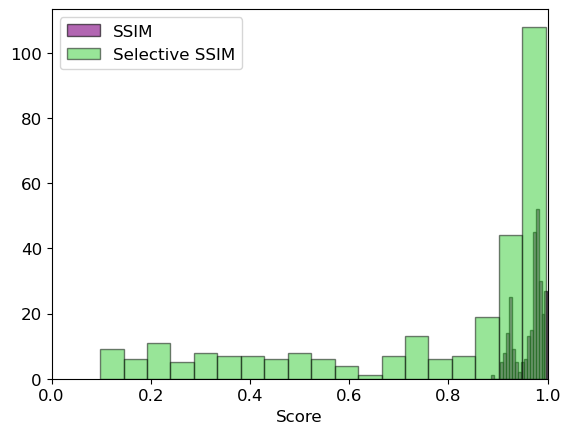

In [36]:
# n fold 4

plt.figure()
plt.hist(fold_4_test_ssim, bins=19, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_4_test_sssim, bins=19, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("srcnn_results_"+change+"/ssim_distribution_test_4.png")

### PSNR Comparison for each n-fold

ValueError: x and y must have same first dimension, but have shapes (10,) and (3,)

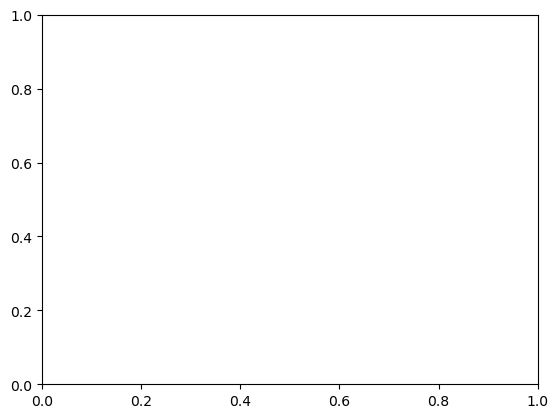

In [38]:
psnr_means = test_results_psnr_0.mean()
psnr_stds = test_results_psnr_0.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)
plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=52.5)
plt.savefig("srcnn_results/psnr_test_0.png")

In [37]:
print(psnr_means, psnr_stds)

NameError: name 'psnr_means' is not defined

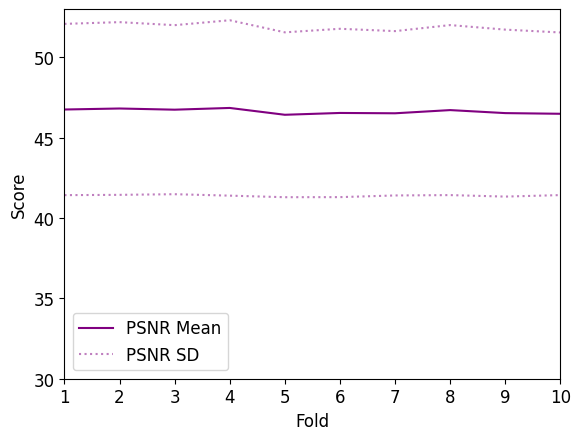

In [70]:
psnr_means = test_results_psnr_1.mean()
psnr_stds = test_results_psnr_1.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=53)
plt.savefig("srcnn_results/psnr_test_1.png")

In [71]:
print(psnr_means, psnr_stds)

0    46.753063
1    46.815911
2    46.742139
3    46.850066
4    46.425374
5    46.538543
6    46.518035
7    46.716632
8    46.529054
9    46.487128
dtype: float64 0    5.328757
1    5.373575
2    5.259719
3    5.457318
4    5.129734
5    5.237788
6    5.113311
7    5.290198
8    5.195072
9    5.059771
dtype: float64


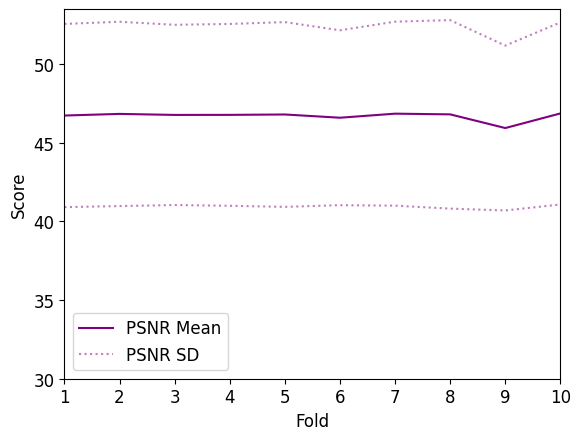

In [74]:
psnr_means = test_results_psnr_2.mean()
psnr_stds = test_results_psnr_2.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=53.5)
plt.savefig("srcnn_results/psnr_test_2.png")

In [75]:
print(psnr_means, psnr_stds)

0    46.734352
1    46.837748
2    46.772979
3    46.776728
4    46.800824
5    46.594868
6    46.852700
7    46.808303
8    45.938945
9    46.867373
dtype: float64 0    5.825115
1    5.859337
2    5.729572
3    5.780490
4    5.873908
5    5.560310
6    5.848878
7    5.992273
8    5.241756
9    5.786862
dtype: float64


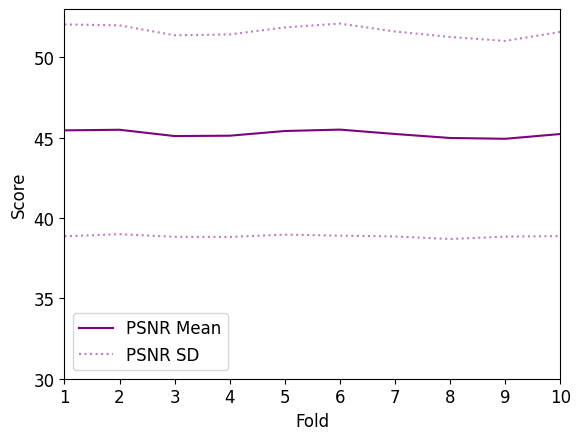

In [77]:
psnr_means = test_results_psnr_3.mean()
psnr_stds = test_results_psnr_3.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=53)
plt.savefig("srcnn_results/psnr_test_3.png")

In [78]:
print(psnr_means, psnr_stds)

0    45.455345
1    45.492549
2    45.101024
3    45.123576
4    45.415322
5    45.502152
6    45.229313
7    44.980907
8    44.931847
9    45.228083
dtype: float64 0    6.592619
1    6.497886
2    6.270835
3    6.300907
4    6.449388
5    6.598151
6    6.376494
7    6.287701
8    6.088092
9    6.354133
dtype: float64


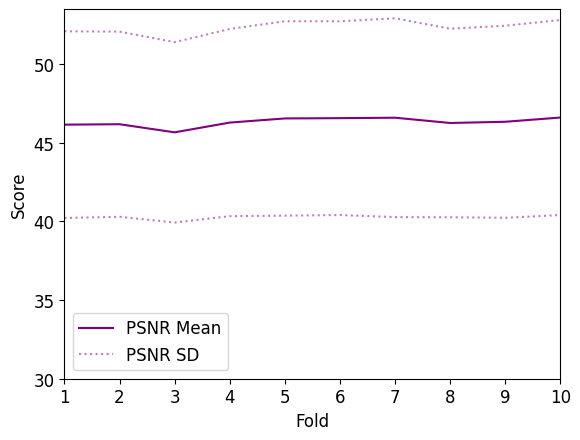

In [79]:
psnr_means = test_results_psnr_4.mean()
psnr_stds = test_results_psnr_4.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=53.5)
plt.savefig("srcnn_results/psnr_test_4.png")

In [80]:
print(psnr_means, psnr_stds)

0    46.154021
1    46.181896
2    45.665859
3    46.285785
4    46.549556
5    46.567654
6    46.595283
7    46.260118
8    46.337656
9    46.606996
dtype: float64 0    5.936010
1    5.886254
2    5.733793
3    5.950729
4    6.180922
5    6.160194
6    6.320356
7    5.995142
8    6.107149
9    6.199822
dtype: float64


### PSNR vals for all n-folds combined

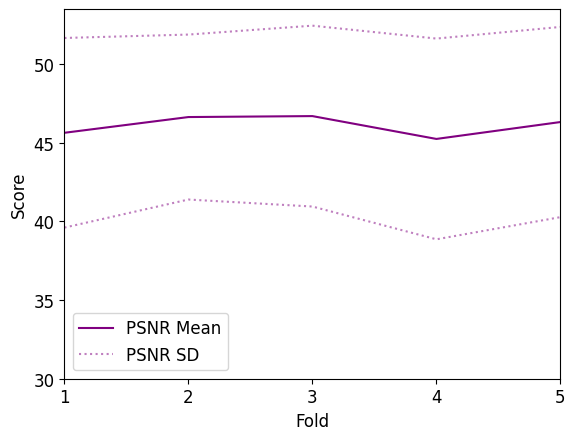

In [81]:
psnr_means_0 = test_results_psnr_0.mean()
psnr_stds_0 = test_results_psnr_0.std()
psnr_std_upper_0 = psnr_means_0 + psnr_stds_0
psnr_std_lower_0 = psnr_means_0 - psnr_stds_0
psnr_means_0 = psnr_means_0.mean()
psnr_stds_0 = psnr_stds_0.mean()
psnr_std_upper_0 = psnr_std_upper_0.mean()
psnr_std_lower_0 = psnr_std_lower_0.mean()

psnr_means_1 = test_results_psnr_1.mean()
psnr_stds_1 = test_results_psnr_1.std()
psnr_std_upper_1 = psnr_means_1 + psnr_stds_1
psnr_std_lower_1 = psnr_means_1 - psnr_stds_1
psnr_means_1 = psnr_means_1.mean()
psnr_stds_1 = psnr_stds_1.mean()
psnr_std_upper_1 = psnr_std_upper_1.mean()
psnr_std_lower_1 = psnr_std_lower_1.mean()

psnr_means_2 = test_results_psnr_2.mean()
psnr_stds_2 = test_results_psnr_2.std()
psnr_std_upper_2 = psnr_means_2 + psnr_stds_2
psnr_std_lower_2 = psnr_means_2 - psnr_stds_2
psnr_means_2 = psnr_means_2.mean()
psnr_stds_2 = psnr_stds_2.mean()
psnr_std_upper_2 = psnr_std_upper_2.mean()
psnr_std_lower_2 = psnr_std_lower_2.mean()

psnr_means_3 = test_results_psnr_3.mean()
psnr_stds_3 = test_results_psnr_3.std()
psnr_std_upper_3 = psnr_means_3 + psnr_stds_3
psnr_std_lower_3 = psnr_means_3 - psnr_stds_3
psnr_means_3 = psnr_means_3.mean()
psnr_stds_3 = psnr_stds_3.mean()
psnr_std_upper_3 = psnr_std_upper_3.mean()
psnr_std_lower_3 = psnr_std_lower_3.mean()

psnr_means_4 = test_results_psnr_4.mean()
psnr_stds_4 = test_results_psnr_4.std()
psnr_std_upper_4 = psnr_means_4 + psnr_stds_4
psnr_std_lower_4 = psnr_means_4 - psnr_stds_4
psnr_means_4 = psnr_means_4.mean()
psnr_stds_4 = psnr_stds_4.mean()
psnr_std_upper_4 = psnr_std_upper_4.mean()
psnr_std_lower_4 = psnr_std_lower_4.mean()

psnr_means = [psnr_means_0, psnr_means_1, psnr_means_2, psnr_means_3, psnr_means_4]
psnr_stds = [psnr_stds_0, psnr_stds_1, psnr_stds_2, psnr_stds_3, psnr_stds_4]
psnr_std_upper = [psnr_std_upper_0, psnr_std_upper_1, psnr_std_upper_2, psnr_std_upper_3, psnr_std_upper_4]
psnr_std_lower = [psnr_std_lower_0, psnr_std_lower_1, psnr_std_lower_2, psnr_std_lower_3, psnr_std_lower_4]


n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(n_folds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=30, ymax=53.5)
plt.savefig("srcnn_results/psnr_test_mean_all_folds.png")

In [82]:
print(psnr_means, psnr_stds)

[45.63703669209879, 46.6375945330616, 46.69848203089133, 45.246011856352666, 46.32048253823087] [6.028478927577205, 5.244524398493089, 5.749849992888639, 6.38162060637778, 6.047037062758592]


### PSNR means and stds over all n-folds

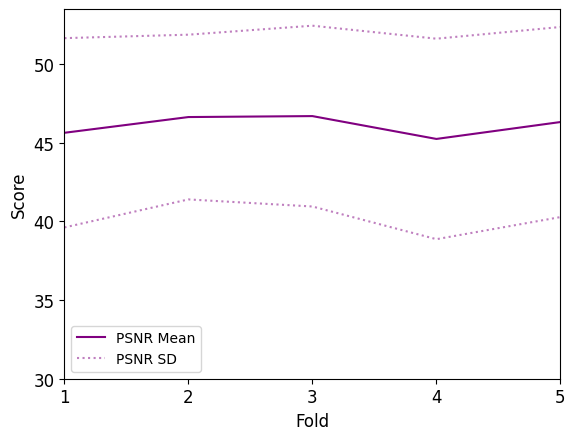

In [11]:
fold_0_test_psnr = np.array(test_results_psnr_0).reshape(-1,1)
fold_1_test_psnr = np.array(test_results_psnr_1).reshape(-1,1)
fold_2_test_psnr = np.array(test_results_psnr_2).reshape(-1,1)
fold_3_test_psnr = np.array(test_results_psnr_3).reshape(-1,1)
fold_4_test_psnr = np.array(test_results_psnr_4).reshape(-1,1)

psnr_means_0 = np.mean(fold_0_test_psnr)
psnr_std_0 = np.std(fold_0_test_psnr)
psnr_std_upper_0 = psnr_means_0 + psnr_std_0
psnr_std_lower_0 = psnr_means_0 - psnr_std_0

psnr_means_1 = np.mean(fold_1_test_psnr)
psnr_std_1 = np.std(fold_1_test_psnr)
psnr_std_upper_1 = psnr_means_1 + psnr_std_1
psnr_std_lower_1 = psnr_means_1 - psnr_std_1

psnr_means_2 = np.mean(fold_2_test_psnr)
psnr_std_2 = np.std(fold_2_test_psnr)
psnr_std_upper_2 = psnr_means_2 + psnr_std_2
psnr_std_lower_2 = psnr_means_2 - psnr_std_2

psnr_means_3 = np.mean(fold_3_test_psnr)
psnr_std_3 = np.std(fold_3_test_psnr)
psnr_std_upper_3 = psnr_means_3 + psnr_std_3
psnr_std_lower_3 = psnr_means_3 - psnr_std_3

psnr_means_4 = np.mean(fold_4_test_psnr)
psnr_std_4 = np.std(fold_4_test_psnr)
psnr_std_upper_4 = psnr_means_4 + psnr_std_4
psnr_std_lower_4 = psnr_means_4 - psnr_std_4
    
psnr_means = [psnr_means_0, psnr_means_1, psnr_means_2, psnr_means_3, psnr_means_4]
psnr_stds = [psnr_std_0, psnr_std_1, psnr_std_2, psnr_std_3, psnr_std_4]
psnr_std_upper = [psnr_std_upper_0, psnr_std_upper_1, psnr_std_upper_2, psnr_std_upper_3, psnr_std_upper_4]
psnr_std_lower = [psnr_std_lower_0, psnr_std_lower_1, psnr_std_lower_2, psnr_std_lower_3, psnr_std_lower_4]

n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(n_folds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],["1","2","3","4","5"],fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=30, ymax=53.5)
plt.savefig("srcnn_results/psnr_test_mean_std_all_folds.png")


In [12]:
print(psnr_means, psnr_stds)

[45.63703669209879, 46.6375945330616, 46.69848203089133, 45.246011856352666, 46.32048253823086] [6.017938849651046, 5.237397948725908, 5.747888755885954, 6.373821007369631, 6.043517492785621]


### Visualize Distribution of PSNR Values

In [58]:
# n fold 0
plt.figure()
plt.hist(fold_0_test_psnr, bins=12, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("srcnn_results_"+change+"/psnr_distribution_test_0.png")

NameError: name 'fold_0_test_psnr' is not defined

<Figure size 640x480 with 0 Axes>

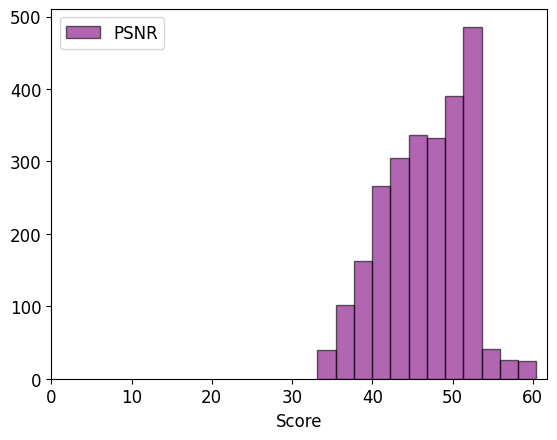

In [86]:
# n fold 1
plt.figure()
plt.hist(fold_1_test_psnr, bins=12, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("srcnn_results/psnr_distribution_test_1.png")

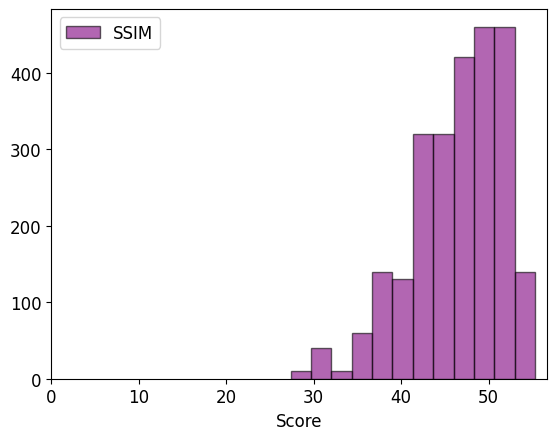

In [65]:
# n fold 2
plt.figure()
plt.hist(fold_2_test_psnr, bins=12, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("srcnn_results/psnr_distribution_test_2.png")

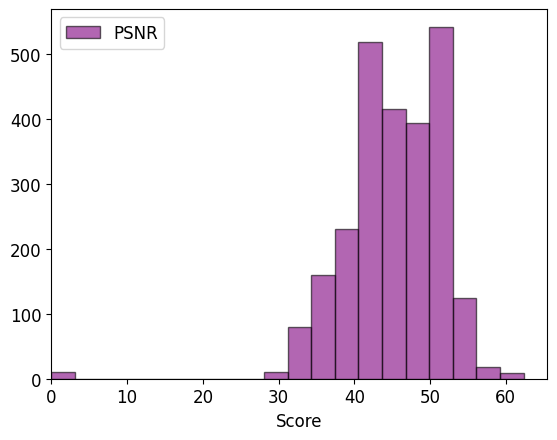

In [88]:
# n fold 3
plt.figure()
plt.hist(fold_3_test_psnr, bins=20, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("srcnn_results/psnr_distribution_test_3.png")

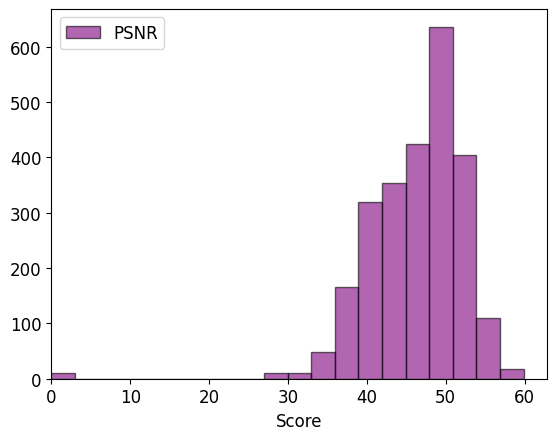

In [89]:
# n fold 4
plt.figure()
plt.hist(fold_4_test_psnr, bins=20, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("srcnn_results/psnr_distribution_test_4.png")

## Visualize Train Set

### Results for each n-fold

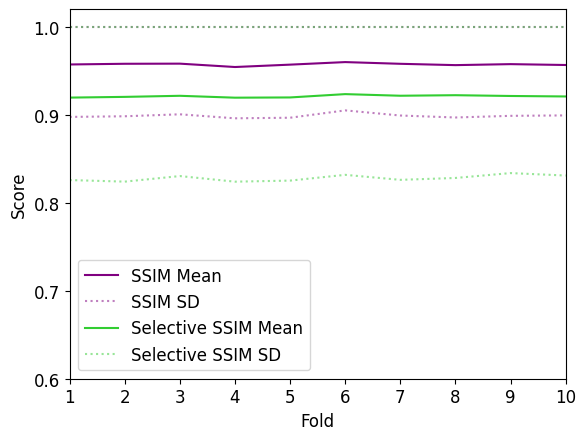

In [90]:
ssim_means = train_results_ssim_0.mean()
ssim_stds = train_results_ssim_0.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1

sssim_means = train_results_sssim_0.mean()
sssim_stds = train_results_sssim_0.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks([0.6,0.7,0.8,0.9,1.0],["0.6","0.7","0.8","0.9","1.0"],fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.6, ymax=1.02)
plt.savefig("srcnn_results/ssim_train_0.png")

In [91]:
print(ssim_means, ssim_stds)

0    0.957103
1    0.957893
2    0.958036
3    0.954211
4    0.956912
5    0.959812
6    0.957864
7    0.956357
8    0.957484
9    0.956503
dtype: float64 0    0.059593
1    0.059645
2    0.057563
3    0.058287
4    0.060327
5    0.054892
6    0.058766
7    0.059494
8    0.058758
9    0.057271
dtype: float64


In [92]:
print(sssim_means, sssim_stds)

0    0.919457
1    0.920278
2    0.921506
3    0.919366
4    0.919633
5    0.923410
6    0.921569
7    0.922186
8    0.921298
9    0.920754
dtype: float64 0    0.093707
1    0.096306
2    0.091208
3    0.095447
4    0.094493
5    0.091729
6    0.095571
7    0.094052
8    0.087621
9    0.089856
dtype: float64


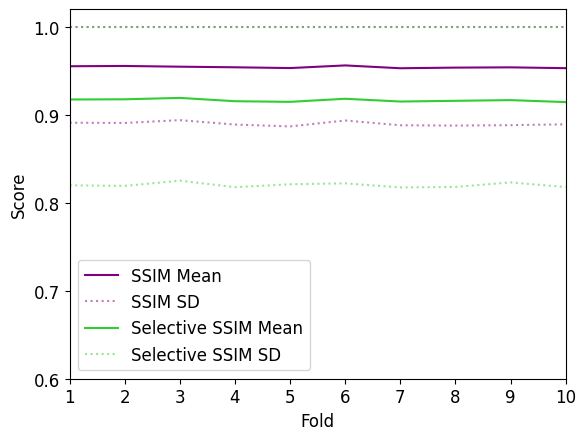

In [93]:
ssim_means = train_results_ssim_1.mean()
ssim_stds = train_results_ssim_1.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1

sssim_means = train_results_sssim_1.mean()
sssim_stds = train_results_sssim_1.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks([0.6,0.7,0.8,0.9,1.0],["0.6","0.7","0.8","0.9","1.0"],fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.6, ymax=1.02)
plt.savefig("srcnn_results/ssim_train_1.png")

In [94]:
print(ssim_means, ssim_stds)

0    0.955096
1    0.955396
2    0.954581
3    0.953909
4    0.953020
5    0.956026
6    0.952817
7    0.953538
8    0.953837
9    0.952896
dtype: float64 0    0.064200
1    0.064751
2    0.060749
3    0.065088
4    0.066294
5    0.062599
6    0.064799
7    0.065855
8    0.065700
9    0.063784
dtype: float64


In [95]:
print(sssim_means, sssim_stds)

0    0.917307
1    0.917525
2    0.919118
3    0.915341
4    0.914631
5    0.918139
6    0.914994
7    0.915794
8    0.916600
9    0.914343
dtype: float64 0    0.097492
1    0.098433
2    0.094061
3    0.097663
4    0.093666
5    0.096135
6    0.097611
7    0.097885
8    0.093510
9    0.096530
dtype: float64


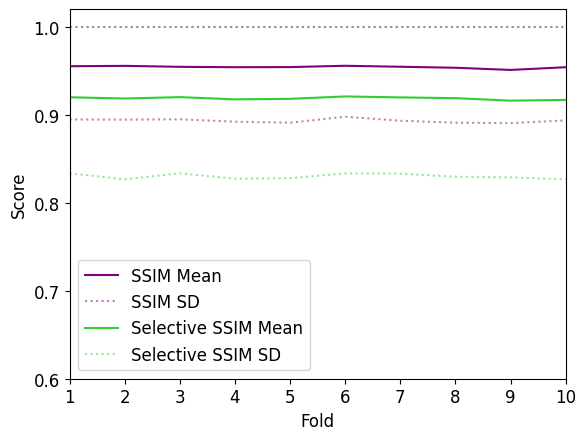

In [96]:
ssim_means = train_results_ssim_2.mean()
ssim_stds = train_results_ssim_2.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = train_results_sssim_2.mean()
sssim_stds = train_results_sssim_2.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks([0.6,0.7,0.8,0.9,1.0],["0.6","0.7","0.8","0.9","1.0"],fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.6, ymax=1.02)
plt.savefig("srcnn_results/ssim_train_2.png")

In [97]:
print(sssim_means, sssim_stds)

0    0.919838
1    0.918423
2    0.919972
3    0.917472
4    0.918034
5    0.920781
6    0.919687
7    0.918805
8    0.915980
9    0.916809
dtype: float64 0    0.086444
1    0.091811
2    0.086458
3    0.090245
4    0.090107
5    0.087430
6    0.086667
7    0.089299
8    0.087189
9    0.090320
dtype: float64


In [98]:
print(ssim_means, ssim_stds)

0    0.955108
1    0.955520
2    0.954428
3    0.953990
4    0.954131
5    0.955620
6    0.954512
7    0.953363
8    0.950892
9    0.953978
dtype: float64 0    0.060524
1    0.061149
2    0.059624
3    0.061924
4    0.063196
5    0.057885
6    0.061356
7    0.062415
8    0.060464
9    0.060423
dtype: float64


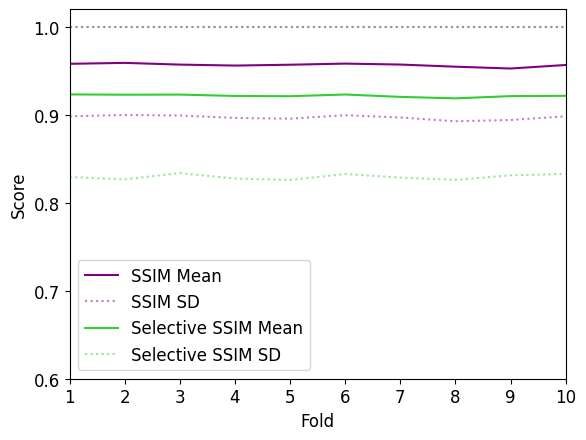

In [99]:
ssim_means = train_results_ssim_3.mean()
ssim_stds = train_results_ssim_3.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = train_results_sssim_3.mean()
sssim_stds = train_results_sssim_3.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks([0.6,0.7,0.8,0.9,1.0],["0.6","0.7","0.8","0.9","1.0"],fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.6, ymax=1.02)
plt.savefig("srcnn_results/ssim_train_3.png")

In [100]:
print(ssim_means, ssim_stds)

0    0.957854
1    0.958915
2    0.956958
3    0.955853
4    0.956819
5    0.958092
6    0.957006
7    0.954583
8    0.952522
9    0.956501
dtype: float64 0    0.059633
1    0.059203
2    0.057828
3    0.059504
4    0.061323
5    0.058653
6    0.060143
7    0.062033
8    0.058503
9    0.058333
dtype: float64


In [101]:
print(sssim_means, sssim_stds)

0    0.923094
1    0.922739
2    0.922887
3    0.921317
4    0.921034
5    0.922978
6    0.920257
7    0.918623
8    0.921143
9    0.921473
dtype: float64 0    0.093831
1    0.096211
2    0.089171
3    0.093857
4    0.095175
5    0.090348
6    0.091711
7    0.092658
8    0.090012
9    0.088809
dtype: float64


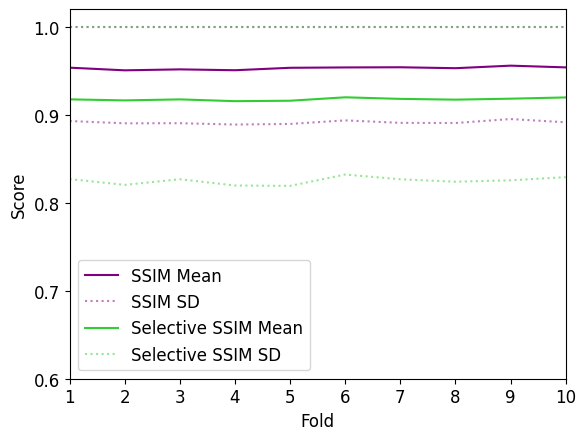

In [102]:
ssim_means = train_results_ssim_4.mean()
ssim_stds = train_results_ssim_4.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = train_results_sssim_4.mean()
sssim_stds = train_results_sssim_4.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks([0.6,0.7,0.8,0.9,1.0],["0.6","0.7","0.8","0.9","1.0"],fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.6, ymax=1.02)
plt.savefig("srcnn_results/ssim_train_4.png")

In [103]:
print(sssim_means, sssim_stds)

0    0.917465
1    0.916285
2    0.917426
3    0.915414
4    0.915898
5    0.919792
6    0.917996
7    0.917129
8    0.918229
9    0.919643
dtype: float64 0    0.090587
1    0.096002
2    0.090745
3    0.095842
4    0.096795
5    0.087755
6    0.091342
7    0.093270
8    0.092797
9    0.090582
dtype: float64


In [104]:
print(ssim_means, ssim_stds)

0    0.953472
1    0.950449
2    0.951536
3    0.950559
4    0.953333
5    0.953735
6    0.953928
7    0.952867
8    0.955753
9    0.953794
dtype: float64 0    0.060640
1    0.060222
2    0.061175
3    0.061709
4    0.063813
5    0.060158
6    0.063185
7    0.062276
8    0.060669
9    0.062392
dtype: float64


### Results for all n-folds combined

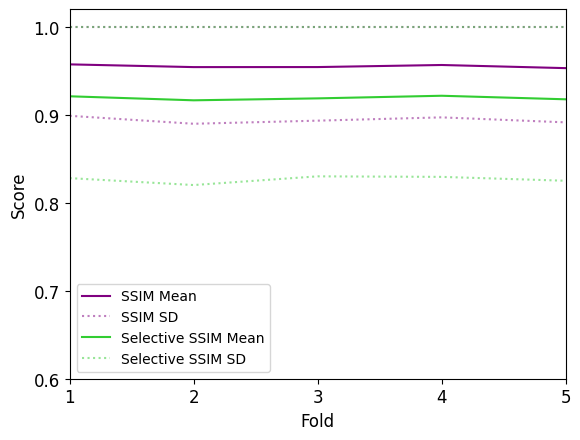

In [105]:
ssim_means_0 = train_results_ssim_0.mean()
ssim_stds_0 = train_results_ssim_0.std()
ssim_std_upper_0 = ssim_means_0 + ssim_stds_0
ssim_std_lower_0 = ssim_means_0 - ssim_stds_0
ssim_means_0 = ssim_means_0.mean()
ssim_stds_0 = ssim_stds_0.mean()
ssim_std_upper_0 = ssim_std_upper_0.mean()
ssim_std_lower_0 = ssim_std_lower_0.mean()

ssim_means_1 = train_results_ssim_1.mean()
ssim_stds_1 = train_results_ssim_1.std()
ssim_std_upper_1 = ssim_means_1 + ssim_stds_1
ssim_std_lower_1 = ssim_means_1 - ssim_stds_1
ssim_means_1 = ssim_means_1.mean()
ssim_stds_1 = ssim_stds_1.mean()
ssim_std_upper_1 = ssim_std_upper_1.mean()
ssim_std_lower_1 = ssim_std_lower_1.mean()

ssim_means_2 = train_results_ssim_2.mean()
ssim_stds_2 = train_results_ssim_2.std()
ssim_std_upper_2 = ssim_means_2 + ssim_stds_2
ssim_std_lower_2 = ssim_means_2 - ssim_stds_2
ssim_means_2 = ssim_means_2.mean()
ssim_stds_2 = ssim_stds_2.mean()
ssim_std_upper_2 = ssim_std_upper_2.mean()
ssim_std_lower_2 = ssim_std_lower_2.mean()

ssim_means_3 = train_results_ssim_3.mean()
ssim_stds_3 = train_results_ssim_3.std()
ssim_std_upper_3 = ssim_means_3 + ssim_stds_3
ssim_std_lower_3 = ssim_means_3 - ssim_stds_3
ssim_means_3 = ssim_means_3.mean()
ssim_stds_3 = ssim_stds_3.mean()
ssim_std_upper_3 = ssim_std_upper_3.mean()
ssim_std_lower_3 = ssim_std_lower_3.mean()

ssim_means_4 = train_results_ssim_4.mean()
ssim_stds_4 = train_results_ssim_4.std()
ssim_std_upper_4 = ssim_means_4 + ssim_stds_4
ssim_std_lower_4 = ssim_means_4 - ssim_stds_4
ssim_means_4 = ssim_means_4.mean()
ssim_stds_4 = ssim_stds_4.mean()
ssim_std_upper_4 = ssim_std_upper_4.mean()
ssim_std_lower_4 = ssim_std_lower_4.mean()

ssim_means = [ssim_means_0, ssim_means_1, ssim_means_2, ssim_means_3, ssim_means_4]
ssim_stds = [ssim_stds_0, ssim_stds_1, ssim_stds_2, ssim_stds_3, ssim_stds_4]
ssim_std_upper = [ssim_std_upper_0, ssim_std_upper_1, ssim_std_upper_2, ssim_std_upper_3, ssim_std_upper_4]
ssim_std_lower = [ssim_std_lower_0, ssim_std_lower_1, ssim_std_lower_2, ssim_std_lower_3, ssim_std_lower_4]

for i in range(len(ssim_std_upper)):
    if ssim_std_upper[i] > 1:
        ssim_std_upper[i] = 1

sssim_means_0 = train_results_sssim_0.mean()
sssim_stds_0 = train_results_sssim_0.std()
sssim_std_upper_0 = sssim_means_0 + sssim_stds_0
sssim_std_lower_0 = sssim_means_0 - sssim_stds_0
sssim_means_0 = sssim_means_0.mean()
sssim_stds_0 = sssim_stds_0.mean()
sssim_std_upper_0 = sssim_std_upper_0.mean()
sssim_std_lower_0 = sssim_std_lower_0.mean()

sssim_means_1 = train_results_sssim_1.mean()
sssim_stds_1 = train_results_sssim_1.std()
sssim_std_upper_1 = sssim_means_1 + sssim_stds_1
sssim_std_lower_1 = sssim_means_1 - sssim_stds_1
sssim_means_1 = sssim_means_1.mean()
sssim_stds_1 = sssim_stds_1.mean()
sssim_std_upper_1 = sssim_std_upper_1.mean()
sssim_std_lower_1 = sssim_std_lower_1.mean()

sssim_means_2 = train_results_sssim_2.mean()
sssim_stds_2 = train_results_sssim_2.std()
sssim_std_upper_2 = sssim_means_2 + sssim_stds_2
sssim_std_lower_2 = sssim_means_2 - sssim_stds_2
sssim_means_2 = sssim_means_2.mean()
sssim_stds_2 = sssim_stds_2.mean()
sssim_std_upper_2 = sssim_std_upper_2.mean()
sssim_std_lower_2 = sssim_std_lower_2.mean()

sssim_means_3 = train_results_sssim_3.mean()
sssim_stds_3 = train_results_sssim_3.std()
sssim_std_upper_3 = sssim_means_3 + sssim_stds_3
sssim_std_lower_3 = sssim_means_3 - sssim_stds_3
sssim_means_3 = sssim_means_3.mean()
sssim_stds_3 = sssim_stds_3.mean()
sssim_std_upper_3 = sssim_std_upper_3.mean()
sssim_std_lower_3 = sssim_std_lower_3.mean()

sssim_means_4 = train_results_sssim_4.mean()
sssim_stds_4 = train_results_sssim_4.std()
sssim_std_upper_4 = sssim_means_4 + sssim_stds_4
sssim_std_lower_4 = sssim_means_4 - sssim_stds_4
sssim_means_4 = sssim_means_4.mean()
sssim_stds_4 = sssim_stds_4.mean()
sssim_std_upper_4 = sssim_std_upper_4.mean()
sssim_std_lower_4 = sssim_std_lower_4.mean()

sssim_means = [sssim_means_0, sssim_means_1, sssim_means_2, sssim_means_3, sssim_means_4]
sssim_stds = [sssim_stds_0, sssim_stds_1, sssim_stds_2, sssim_stds_3, sssim_stds_4]
sssim_std_upper = [sssim_std_upper_0, sssim_std_upper_1, sssim_std_upper_2, sssim_std_upper_3, sssim_std_upper_4]
sssim_std_lower = [sssim_std_lower_0, sssim_std_lower_1, sssim_std_lower_2, sssim_std_lower_3, sssim_std_lower_4]

for i in range(len(sssim_std_upper)):
    if sssim_std_upper[i] > 1:
        sssim_std_upper[i] = 1

n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(n_folds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(n_folds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(n_folds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)


plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],["1","2","3","4","5"],fontsize=12)
plt.yticks([0.6,0.7,0.8,0.9,1.0],["0.6","0.7","0.8","0.9","1.0"],fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=0.6, ymax=1.02)
plt.savefig("srcnn_results/ssim_train_mean_all_folds.png")

In [106]:
print(ssim_means, ssim_stds)

[0.9572173936980942, 0.9541116712922924, 0.9541539917146988, 0.9565103285089054, 0.9529427030011103] [0.05845963325390011, 0.06438174274167537, 0.060896014833353926, 0.05951560325053824, 0.06162404578841198]


In [107]:
print(sssim_means, sssim_stds)

[0.9209455417177652, 0.9163791046389994, 0.9185801678604871, 0.921554369584437, 0.9175277470599665] [0.0929989322066023, 0.09629858400821276, 0.0885967751757697, 0.09217825674481131, 0.09257152524614198]


### Mean and SD on all n-folds combined

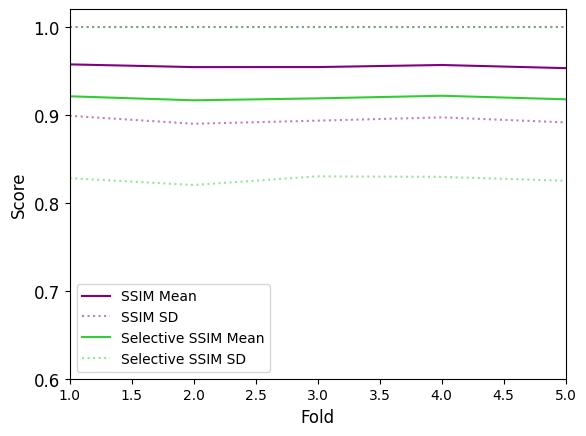

In [13]:
fold_0_train_ssim = np.array(train_results_ssim_0).reshape(-1,1)
fold_1_train_ssim = np.array(train_results_ssim_1).reshape(-1,1)
fold_2_train_ssim = np.array(train_results_ssim_2).reshape(-1,1)
fold_3_train_ssim = np.array(train_results_ssim_3).reshape(-1,1)
fold_4_train_ssim = np.array(train_results_ssim_4).reshape(-1,1)

ssim_means_0 = np.mean(fold_0_train_ssim)
ssim_std_0 = np.std(fold_0_train_ssim)
ssim_std_upper_0 = ssim_means_0 + ssim_std_0
ssim_std_lower_0 = ssim_means_0 - ssim_std_0
if ssim_std_upper_0 > 1:
    ssim_std_upper_0 = 1

ssim_means_1 = np.mean(fold_1_train_ssim)
ssim_std_1 = np.std(fold_1_train_ssim)
ssim_std_upper_1 = ssim_means_1 + ssim_std_1
ssim_std_lower_1 = ssim_means_1 - ssim_std_1
if ssim_std_upper_1 > 1:
    ssim_std_upper_1 = 1

ssim_means_2 = np.mean(fold_2_train_ssim)
ssim_std_2 = np.std(fold_2_train_ssim)
ssim_std_upper_2 = ssim_means_2 + ssim_std_2
ssim_std_lower_2 = ssim_means_2 - ssim_std_2
if ssim_std_upper_2 > 1:
    ssim_std_upper_2 = 1

ssim_means_3 = np.mean(fold_3_train_ssim)
ssim_std_3 = np.std(fold_3_train_ssim)
ssim_std_upper_3 = ssim_means_3 + ssim_std_3
ssim_std_lower_3 = ssim_means_3 - ssim_std_3
if ssim_std_upper_3 > 1:
    ssim_std_upper_3 = 1

ssim_means_4 = np.mean(fold_4_train_ssim)
ssim_std_4 = np.std(fold_4_train_ssim)
ssim_std_upper_4 = ssim_means_4 + ssim_std_4
ssim_std_lower_4 = ssim_means_4 - ssim_std_4
if ssim_std_upper_4 > 1:
    ssim_std_upper_4 = 1
    
ssim_means = [ssim_means_0, ssim_means_1, ssim_means_2, ssim_means_3, ssim_means_4]
ssim_stds = [ssim_std_0, ssim_std_1, ssim_std_2, ssim_std_3, ssim_std_4]
ssim_std_upper = [ssim_std_upper_0, ssim_std_upper_1, ssim_std_upper_2, ssim_std_upper_3, ssim_std_upper_4]
ssim_std_lower = [ssim_std_lower_0, ssim_std_lower_1, ssim_std_lower_2, ssim_std_lower_3, ssim_std_lower_4]

fold_0_train_sssim = np.array(train_results_sssim_0).reshape(-1,1)
fold_1_train_sssim = np.array(train_results_sssim_1).reshape(-1,1)
fold_2_train_sssim = np.array(train_results_sssim_2).reshape(-1,1)
fold_3_train_sssim = np.array(train_results_sssim_3).reshape(-1,1)
fold_4_train_sssim = np.array(train_results_sssim_4).reshape(-1,1)

sssim_means_0 = np.mean(fold_0_train_sssim)
sssim_std_0 = np.std(fold_0_train_sssim)
sssim_std_upper_0 = sssim_means_0 + sssim_std_0
sssim_std_lower_0 = sssim_means_0 - sssim_std_0
if sssim_std_upper_0 > 1:
    sssim_std_upper_0 = 1

sssim_means_1 = np.mean(fold_1_train_sssim)
sssim_std_1 = np.std(fold_1_train_sssim)
sssim_std_upper_1 = sssim_means_1 + sssim_std_1
sssim_std_lower_1 = sssim_means_1 - sssim_std_1
if sssim_std_upper_1 > 1:
    sssim_std_upper_1 = 1

sssim_means_2 = np.mean(fold_2_train_sssim)
sssim_std_2 = np.std(fold_2_train_sssim)
sssim_std_upper_2 = sssim_means_2 + sssim_std_2
sssim_std_lower_2 = sssim_means_2 - sssim_std_2
if sssim_std_upper_2 > 1:
    sssim_std_upper_2 = 1

sssim_means_3 = np.mean(fold_3_train_sssim)
sssim_std_3 = np.std(fold_3_train_sssim)
sssim_std_upper_3 = sssim_means_3 + sssim_std_3
sssim_std_lower_3 = sssim_means_3 - sssim_std_3
if sssim_std_upper_3 > 1:
    sssim_std_upper_3 = 1

sssim_means_4 = np.mean(fold_4_train_sssim)
sssim_std_4 = np.std(fold_4_train_sssim)
sssim_std_upper_4 = sssim_means_4 + sssim_std_4
sssim_std_lower_4 = sssim_means_4 - sssim_std_4
if sssim_std_upper_4 > 1:
    sssim_std_upper_4 = 1
    
    
sssim_means = [sssim_means_0, sssim_means_1, sssim_means_2, sssim_means_3, sssim_means_4]
sssim_stds = [sssim_std_0, sssim_std_1, sssim_std_2, sssim_std_3, sssim_std_4]
sssim_std_upper = [sssim_std_upper_0, sssim_std_upper_1, sssim_std_upper_2, sssim_std_upper_3, sssim_std_upper_4]
sssim_std_lower = [sssim_std_lower_0, sssim_std_lower_1, sssim_std_lower_2, sssim_std_lower_3, sssim_std_lower_4]

n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(n_folds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(n_folds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(n_folds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)


plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.yticks([0.6,0.7,0.8,0.9,1.0],["0.6","0.7","0.8","0.9","1.0"],fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=0.6, ymax=1.02)
plt.savefig("srcnn_results/ssim_train_mean_std_all_folds.png")


In [14]:
print(ssim_means, ssim_stds)

[0.9572173936980943, 0.9541116712922922, 0.9541539917146987, 0.9565103285089053, 0.9529427030011102] [0.058462364031104296, 0.06437428907104341, 0.060892268158801555, 0.05952187790781603, 0.061621467594986885]


In [15]:
print(sssim_means, sssim_stds)

[0.9209455417177653, 0.9163791046389994, 0.9185801678604874, 0.921554369584437, 0.9175277470599665] [0.09299371022491412, 0.09627379853130856, 0.0885792761081916, 0.09216939787769624, 0.09257193131942842]


### Distribution plots SSIM/SSSIM Values


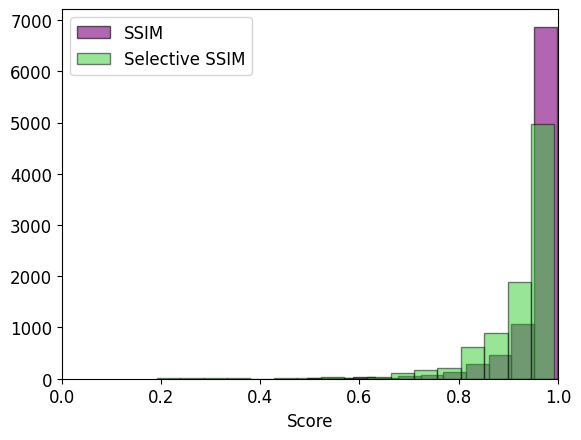

In [111]:
# n fold 0
plt.figure()
plt.hist(fold_0_train_ssim, bins=11, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_0_train_sssim, bins=17, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("srcnn_results/ssim_distribution_train_0.png")

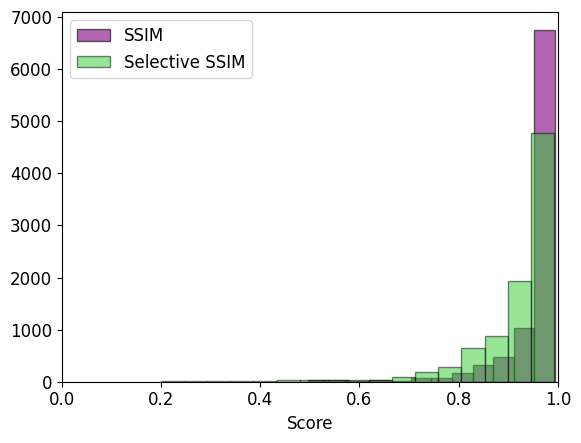

In [112]:
# n fold 1
plt.figure()
plt.hist(fold_1_train_ssim, bins=12, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_1_train_sssim, bins=17, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("srcnn_results/ssim_distribution_train_1.png")

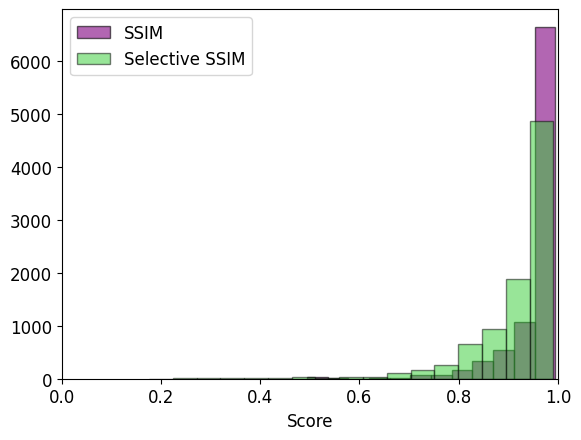

In [113]:
# n fold 2
plt.figure()
plt.hist(fold_2_train_ssim, bins=12, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_2_train_sssim, bins=17, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("srcnn_results/ssim_distribution_train_2.png")

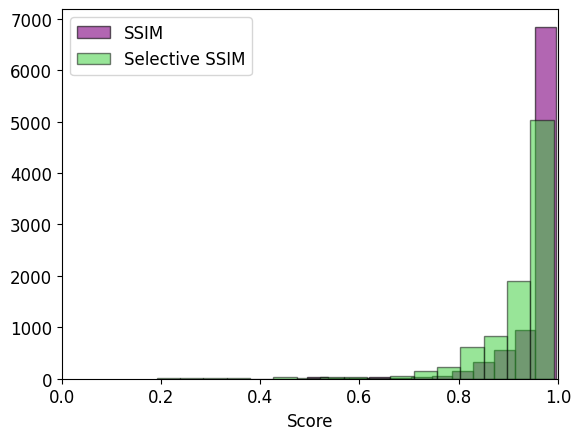

In [114]:
# n fold 3
plt.figure()
plt.hist(fold_3_train_ssim, bins=12, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_3_train_sssim, bins=17, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("srcnn_results/ssim_distribution_train_3.png")

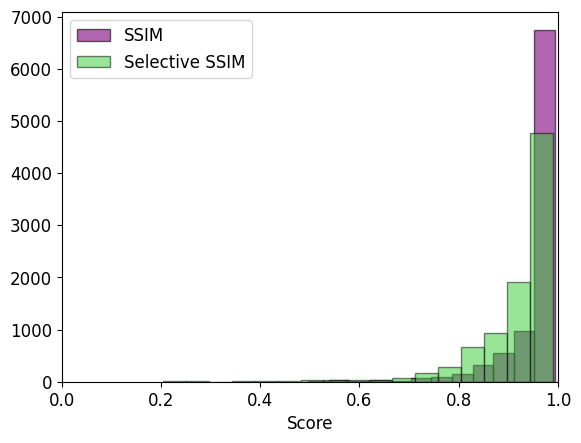

In [115]:
# n fold 4
plt.figure()
plt.hist(fold_4_train_ssim, bins=12, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_4_train_sssim, bins=17, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("srcnn_results/ssim_distribution_train_4.png")

### PSNR Results for each n-fold

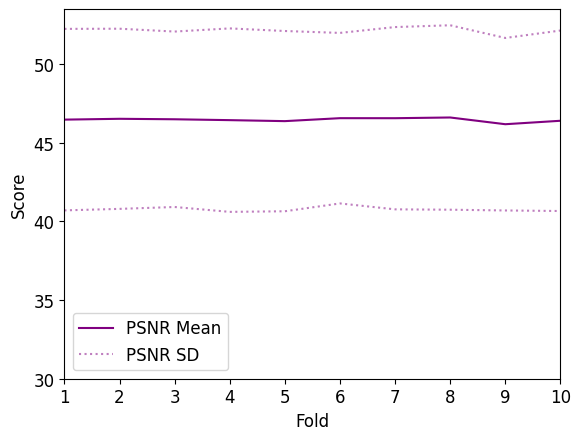

In [117]:
psnr_means = train_results_psnr_0.mean()
psnr_stds = train_results_psnr_0.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=53.5)
plt.savefig("srcnn_results/psnr_train_0.png")

In [118]:
print(psnr_means, psnr_stds)

0    46.473874
1    46.526631
2    46.496361
3    46.441089
4    46.377947
5    46.566207
6    46.564364
7    46.609842
8    46.182204
9    46.400948
dtype: float64 0    5.770168
1    5.727612
2    5.577529
3    5.832492
4    5.730477
5    5.421163
6    5.794711
7    5.863661
8    5.483877
9    5.737724
dtype: float64


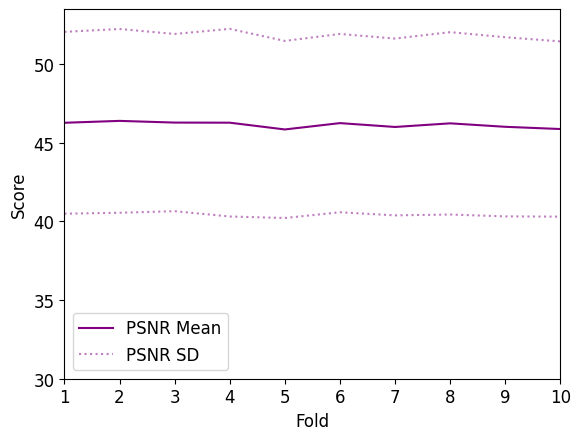

In [120]:
psnr_means = train_results_psnr_1.mean()
psnr_stds = train_results_psnr_1.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=53.5)
plt.savefig("srcnn_results/psnr_train_1.png")

In [121]:
print(psnr_means, psnr_stds)

0    46.273883
1    46.393986
2    46.286228
3    46.279260
4    45.848941
5    46.251826
6    46.007191
7    46.237718
8    46.017496
9    45.876145
dtype: float64 0    5.780214
1    5.842849
2    5.634285
3    5.965124
4    5.629508
5    5.668493
6    5.620335
7    5.798033
8    5.695638
9    5.571490
dtype: float64


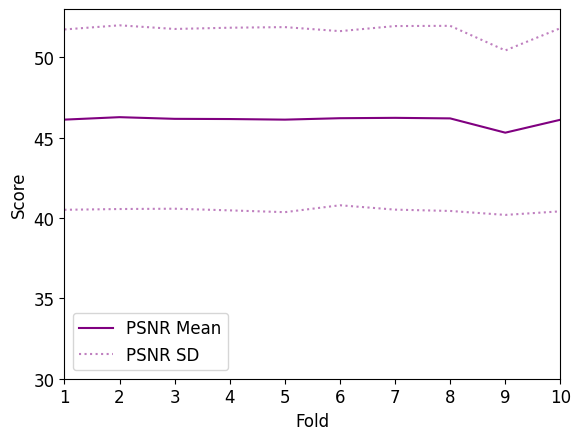

In [123]:
psnr_means = train_results_psnr_2.mean()
psnr_stds = train_results_psnr_2.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=53)
plt.savefig("srcnn_results/psnr_train_2.png")

In [124]:
print(psnr_means, psnr_stds)

0    46.123591
1    46.276250
2    46.172560
3    46.159749
4    46.122557
5    46.211598
6    46.234192
7    46.200070
8    45.311431
9    46.115742
dtype: float64 0    5.611089
1    5.716008
2    5.592851
3    5.683473
4    5.757941
5    5.418000
6    5.711875
7    5.760218
8    5.117592
9    5.699293
dtype: float64


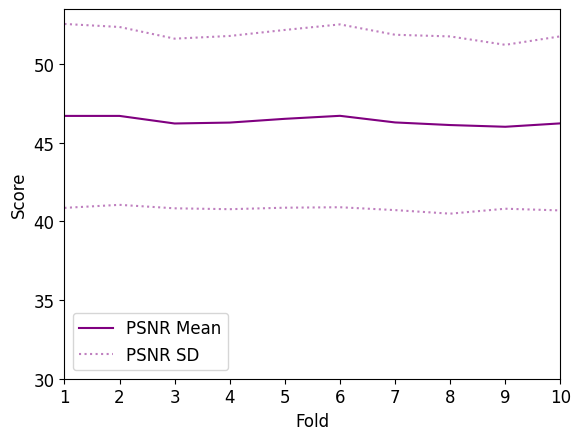

In [126]:
psnr_means = train_results_psnr_3.mean()
psnr_stds = train_results_psnr_3.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=53.5)
plt.savefig("srcnn_results/psnr_train_3.png")

In [127]:
print(psnr_means, psnr_stds)

0    46.710001
1    46.710251
2    46.228289
3    46.286440
4    46.525241
5    46.716028
6    46.295408
7    46.129288
8    46.019694
9    46.235531
dtype: float64 0    5.846918
1    5.654518
2    5.393385
3    5.507077
4    5.650863
5    5.812930
6    5.574254
7    5.634367
8    5.210392
9    5.534442
dtype: float64


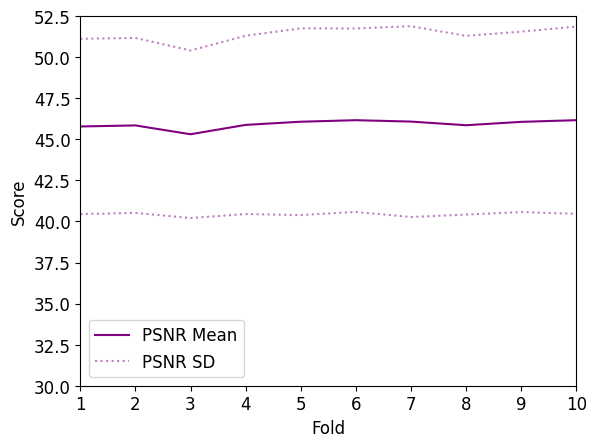

In [128]:
psnr_means = train_results_psnr_4.mean()
psnr_stds = train_results_psnr_4.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=52.5)
plt.savefig("srcnn_results/psnr_train_4.png")

In [129]:
print(psnr_means, psnr_stds)

0    45.782521
1    45.846332
2    45.308855
3    45.878687
4    46.071833
5    46.163997
6    46.079783
7    45.857825
8    46.063143
9    46.164560
dtype: float64 0    5.335720
1    5.325119
2    5.100762
3    5.426696
4    5.682288
5    5.583027
6    5.807993
7    5.439589
8    5.491995
9    5.698103
dtype: float64


### PSNR Results for all n-folds combined

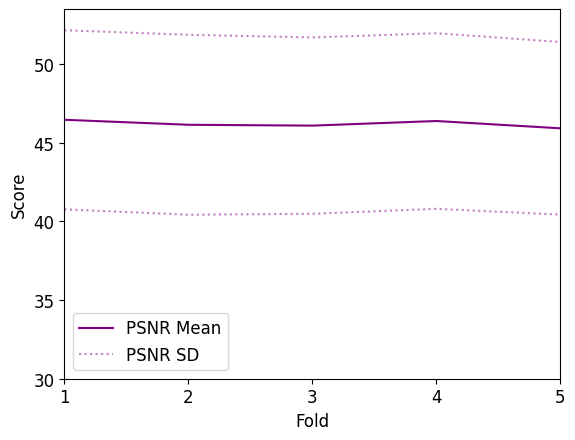

In [130]:
psnr_means_0 = train_results_psnr_0.mean()
psnr_stds_0 = train_results_psnr_0.std()
psnr_std_upper_0 = psnr_means_0 + psnr_stds_0
psnr_std_lower_0 = psnr_means_0 - psnr_stds_0
psnr_means_0 = psnr_means_0.mean()
psnr_stds_0 = psnr_stds_0.mean()
psnr_std_upper_0 = psnr_std_upper_0.mean()
psnr_std_lower_0 = psnr_std_lower_0.mean()

psnr_means_1 = train_results_psnr_1.mean()
psnr_stds_1 = train_results_psnr_1.std()
psnr_std_upper_1 = psnr_means_1 + psnr_stds_1
psnr_std_lower_1 = psnr_means_1 - psnr_stds_1
psnr_means_1 = psnr_means_1.mean()
psnr_stds_1 = psnr_stds_1.mean()
psnr_std_upper_1 = psnr_std_upper_1.mean()
psnr_std_lower_1 = psnr_std_lower_1.mean()

psnr_means_2 = train_results_psnr_2.mean()
psnr_stds_2 = train_results_psnr_2.std()
psnr_std_upper_2 = psnr_means_2 + psnr_stds_2
psnr_std_lower_2 = psnr_means_2 - psnr_stds_2
psnr_means_2 = psnr_means_2.mean()
psnr_stds_2 = psnr_stds_2.mean()
psnr_std_upper_2 = psnr_std_upper_2.mean()
psnr_std_lower_2 = psnr_std_lower_2.mean()

psnr_means_3 = train_results_psnr_3.mean()
psnr_stds_3 = train_results_psnr_3.std()
psnr_std_upper_3 = psnr_means_3 + psnr_stds_3
psnr_std_lower_3 = psnr_means_3 - psnr_stds_3
psnr_means_3 = psnr_means_3.mean()
psnr_stds_3 = psnr_stds_3.mean()
psnr_std_upper_3 = psnr_std_upper_3.mean()
psnr_std_lower_3 = psnr_std_lower_3.mean()

psnr_means_4 = train_results_psnr_4.mean()
psnr_stds_4 = train_results_psnr_4.std()
psnr_std_upper_4 = psnr_means_4 + psnr_stds_4
psnr_std_lower_4 = psnr_means_4 - psnr_stds_4
psnr_means_4 = psnr_means_4.mean()
psnr_stds_4 = psnr_stds_4.mean()
psnr_std_upper_4 = psnr_std_upper_4.mean()
psnr_std_lower_4 = psnr_std_lower_4.mean()

psnr_means = [psnr_means_0, psnr_means_1, psnr_means_2, psnr_means_3, psnr_means_4]
psnr_stds = [psnr_stds_0, psnr_stds_1, psnr_stds_2, psnr_stds_3, psnr_stds_4]
psnr_std_upper = [psnr_std_upper_0, psnr_std_upper_1, psnr_std_upper_2, psnr_std_upper_3, psnr_std_upper_4]
psnr_std_lower = [psnr_std_lower_0, psnr_std_lower_1, psnr_std_lower_2, psnr_std_lower_3, psnr_std_lower_4]


n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(n_folds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=30, ymax=53.5)
plt.savefig("srcnn_results/psnr_train_mean_all_folds.png")

In [131]:
print(psnr_means, psnr_stds)

[46.46394671356505, 46.14726730816637, 46.09277404653907, 46.38561702457305, 45.92175369051003] [5.693941429953327, 5.7205969367924485, 5.606833996913759, 5.581914551128394, 5.489129418941825]


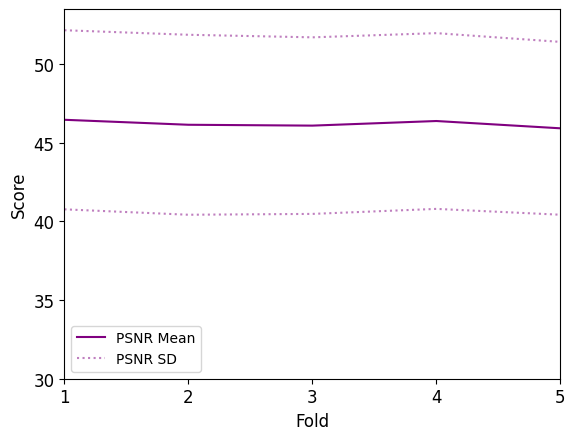

In [16]:
fold_0_train_psnr = np.array(train_results_psnr_0).reshape(-1,1)
fold_1_train_psnr = np.array(train_results_psnr_1).reshape(-1,1)
fold_2_train_psnr = np.array(train_results_psnr_2).reshape(-1,1)
fold_3_train_psnr = np.array(train_results_psnr_3).reshape(-1,1)
fold_4_train_psnr = np.array(train_results_psnr_4).reshape(-1,1)

psnr_means_0 = np.mean(fold_0_train_psnr)
psnr_std_0 = np.std(fold_0_train_psnr)
psnr_std_upper_0 = psnr_means_0 + psnr_std_0
psnr_std_lower_0 = psnr_means_0 - psnr_std_0

psnr_means_1 = np.mean(fold_1_train_psnr)
psnr_std_1 = np.std(fold_1_train_psnr)
psnr_std_upper_1 = psnr_means_1 + psnr_std_1
psnr_std_lower_1 = psnr_means_1 - psnr_std_1

psnr_means_2 = np.mean(fold_2_train_psnr)
psnr_std_2 = np.std(fold_2_train_psnr)
psnr_std_upper_2 = psnr_means_2 + psnr_std_2
psnr_std_lower_2 = psnr_means_2 - psnr_std_2

psnr_means_3 = np.mean(fold_3_train_psnr)
psnr_std_3 = np.std(fold_3_train_psnr)
psnr_std_upper_3 = psnr_means_3 + psnr_std_3
psnr_std_lower_3 = psnr_means_3 - psnr_std_3

psnr_means_4 = np.mean(fold_4_train_psnr)
psnr_std_4 = np.std(fold_4_train_psnr)
psnr_std_upper_4 = psnr_means_4 + psnr_std_4
psnr_std_lower_4 = psnr_means_4 - psnr_std_4
    
psnr_means = [psnr_means_0, psnr_means_1, psnr_means_2, psnr_means_3, psnr_means_4]
psnr_stds = [psnr_std_0, psnr_std_1, psnr_std_2, psnr_std_3, psnr_std_4]
psnr_std_upper = [psnr_std_upper_0, psnr_std_upper_1, psnr_std_upper_2, psnr_std_upper_3, psnr_std_upper_4]
psnr_std_lower = [psnr_std_lower_0, psnr_std_lower_1, psnr_std_lower_2, psnr_std_lower_3, psnr_std_lower_4]

n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(n_folds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],["1","2","3","4","5"],fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=30, ymax=53.5)
plt.savefig("srcnn_results/psnr_train_mean_std_all_folds.png")


In [17]:
print(psnr_means, psnr_stds)

[46.46394671356506, 46.14726730816637, 46.09277404653907, 46.38561702457305, 45.92175369051003] [5.693753096540498, 5.721505991083349, 5.61318571575996, 5.587070122372344, 5.495101838933904]


### Distribution of PSNR values

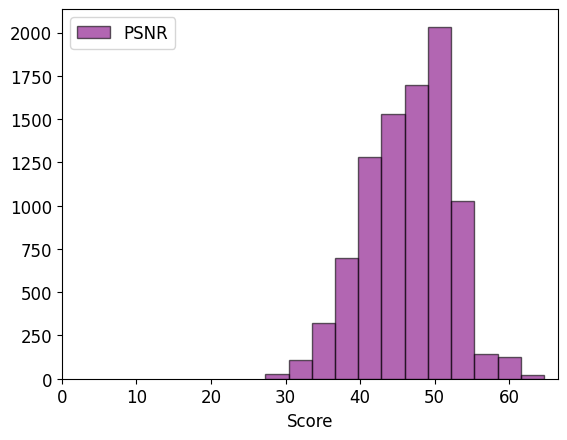

In [133]:
# n fold 0
plt.figure()
plt.hist(fold_0_train_psnr, bins=12, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("srcnn_results/psnr_distribution_train_0.png")

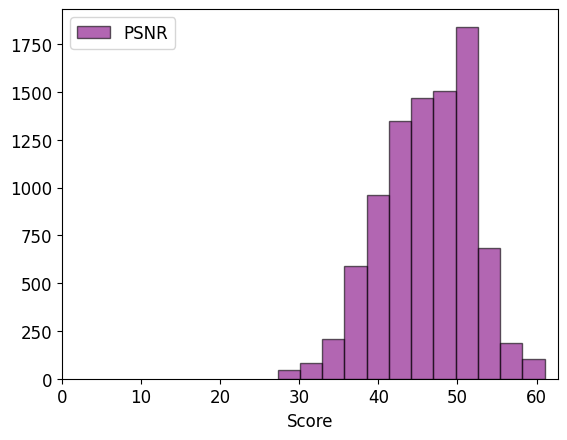

In [134]:
# n fold 1
plt.figure()
plt.hist(fold_1_train_psnr, bins=12, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("srcnn_results/psnr_distribution_train_1.png")

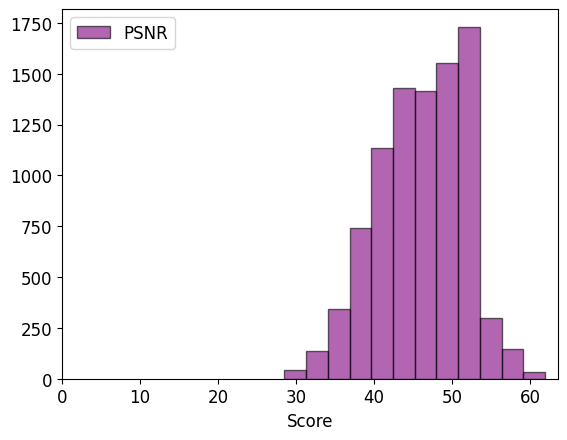

In [135]:
# n fold 2
plt.figure()
plt.hist(fold_2_train_psnr, bins=12, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("srcnn_results/psnr_distribution_train_2.png")

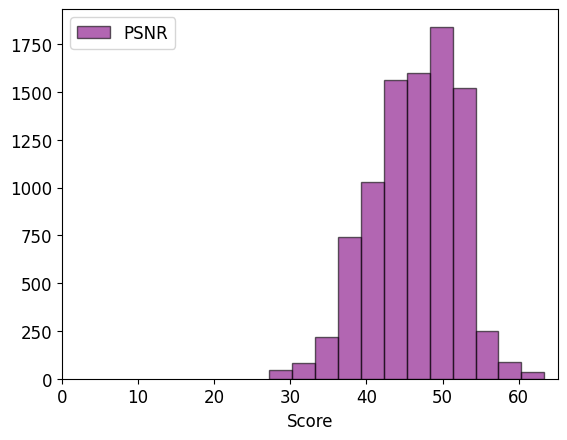

In [136]:
# n fold 3
plt.figure()
plt.hist(fold_3_train_psnr, bins=12, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("srcnn_results/psnr_distribution_train_3.png")

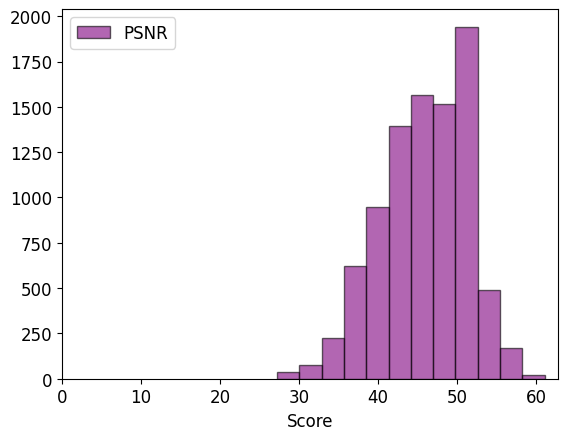

In [137]:
# n fold 4
plt.figure()
plt.hist(fold_4_train_psnr, bins=12, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("srcnn_results/psnr_distribution_train_4.png")